# Latar Belakang

Perusahaan ritel Costco adalah perusahaan asal Amerika Serikat yang secara langsung menjual barang atau jasa kepada konsumen akhir. Perusahaan Costo berfungsi sebagai perantara antara produsen atau distributor dengan pelanggan akhir, menyediakan akses ke produk dan layanan untuk kebutuhan konsumen sehari-hari. Costco dapat beroperasi di berbagai sektor dan format, termasuk katalog, toko fisik dan toko online. Costco telah melakukan beberapa kampanye dalam 2 tahun terakhir, namun perusahaan menerima laporan bahwaa pelanggan yang pernah menerima penawaran hanya sekitar 27,3 %.


# Pernyataan Masalah

Perusahaan menerima laporan bahwa pelanggan yang menerima tawaran produk hanya 27,3% yang artinya 72,7% pelanggan tidak pernah menerima tawaran produk, yang artinya strategi pemasaran, produk dan saluran komunikasi yang disampaikan tidak tepat dengan kebutuhan pelanggan.Sehingga perusahaan harus membuat keputusan- keputusan yang tepat untuk menyesuaikan kebutuhan pelanggan strategi pemasaran, hal ini dapat dilakukan jika perusahaan mampu memahami karakteristik pelanggan yang tidak pernah menerima tawaran sehingga, keputusan- keputusan yang diambil tepat.

Maka sebagai data analyst kita akan mencari tahu

Apa yang menjadi karakteristik pelanggan yang tidak pernah menerima tawaran?


# Tujuan mengetahui karakteristik pelanggan yang tidak pernah menerima tawaran :

Strategi Pemasaran yang Tepat : Identifikasi karakteristik demografis dan perilaku pelanggan yang cenderung tidak merespons tawaran. 
Informasi ini dapat membantu perusahaan membuat strategi yang lebih tepat untuk pelanggan yang tidak pernah menerima tawaran.

Penyesuaian Produk atau Layanan: Dengan memahami preferensi dan kebutuhan pelanggan yang tidak responsif, 
perusahaan dapat menyesuaikan produk atau layanan mereka agar lebih sesuai dengan harapan pasar. 
Ini dapat meningkatkan daya tarik produk atau layanan terhadap kelompok pelanggan yang sebelumnya tidak tertarik.

Peningkatan Strategi Komunikasi: Analisis terhadap pelanggan yang tidak responsif dapat membantu perusahaan
memperbaiki strategi komunikasi mereka. Mungkin diperlukan penyesuaian saluran komunikasi agar lebih efektif.




# Data 
Untuk manganalisa karakteristik pelanggan yang tidak menerima tawaran, maka kita dapat menganalisa data customer yang dikumplukan oleh pihak perusahaan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import shapiro,ttest_ind, ttest_1samp,ttest_rel,f_oneway,kruskal

C:\Users\User\AppData\Local\Temp\ipykernel_6928\964220093.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Informasi Umum Dataset
Data ini berisi informasi demografis pelanggan dari pendapatan, jumlah anak, tingkat pendidikan dan status pernikahan, data jumlah pengeluaran pelanggan per kategori, jumlah penerimaan tawaran produk dengan diskon dan produk, dan jumlah transaksi yang dilakukan melalui online dan onsite,berikut data yang lebih lengkapnya yaitu:

1. Pelanggan

ID: Pengidentifikasi unik pelanggan

Year_Birth: Tahun kelahiran pelanggan

Education: Tingkat pendidikan pelanggan

Marital_Status: Status pernikahan pelanggan

Income: Pendapatan tahunan rumah tangga pelanggan

Kidhome: Jumlah anak di rumah tangga pelanggan

Teenhome: Jumlah remaja di rumah tangga pelanggan

Dt_Customer: Tanggal transaksi

Recency: Jumlah hari sejak pembelian terakhir pelanggan

Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya


2. Produk

MntWines: Jumlah uang yang dihabiskan untuk anggur dalam 2 tahun terakhir

MntFruits: Jumlah uang yang dihabiskan untuk buah dalam 2 tahun terakhir

MntMeatProducts: Jumlah uang yang dihabiskan untuk daging dalam 2 tahun terakhir

MntFishProducts: Jumlah uang yang dihabiskan untuk ikan dalam 2 tahun terakhir

MntSweetProducts: Jumlah uang yang dihabiskan untuk permen dalam 2 tahun terakhir

MntGoldProds: Jumlah uang yang dihabiskan untuk emas dalam 2 tahun terakhir


3. Promosi

NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon

AcceptedCmp1: 1 jika pelanggan menerima penawaran dalam kampanye pertama, 0 sebaliknya

AcceptedCmp2: 1 jika pelanggan menerima penawaran dalam kampanye kedua, 0 sebaliknya

AcceptedCmp3: 1 jika pelanggan menerima penawaran dalam kampanye ketiga, 0 sebaliknya

AcceptedCmp4: 1 jika pelanggan menerima penawaran dalam kampanye keempat, 0 sebaliknya

AcceptedCmp5: 1 jika pelanggan menerima penawaran dalam kampanye kelima, 0 sebaliknya

Response: 1 jika pelanggan menerima penawaran dalam kampanye terakhir, 0 sebaliknya


4. Tempat

NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan

NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog

NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko

NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset Supermarket Customer:

In [2]:
sc=pd.read_csv('Supermarket Customers.csv',sep='\t')
display(sc.head(),sc.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [3]:
sc=pd.read_csv('Supermarket Customers.csv',sep='\t')
sc


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Pemahaman Data

Untuk mendapatkan hasil yang akurat kita harus melakukan data cleaning karena anomali seperti duplikat, missing value, format data yang tidak tepat, dan outliers akan mempengaruhi hasil analisa jika tidak ditangani dengan tepat, data cleaning bertujuan agar tidak ada lagi data yang bermasalah dalam data set yang akan kita analisa.Sebelum Melakukan data cleaning kita perlu check apakah ada Missing value, duplikat, kesalahan penulisan/input, format data yang tidak tepat, dan outliers

# Check Duplikat

In [4]:
#Check Jumlah Duplikat
jumlah_duplikat = sc.duplicated().sum()

# Tampilkan hasil
print(f'Jumlah duplikat dalam DataFrame: {jumlah_duplikat}')

Jumlah duplikat dalam DataFrame: 0


Bisa kita lihat dari data diatas:
1. Tidak ada duplikat di Dataset

# Check Missing Value

In [5]:

sc.isna().sum()/sc.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Bisa kita lihat bahwa:
1. Adanya Missing Value sebanya 1% pada kolom Income
Kita bisa mengetahui bahwa ada missing value pada kolom income sebesar 1%,
ada berapa cara menangani missing value:
1. Menghapu baris yang memiliki data yang memiliki missing value , metode ini yang bisa kita gunakan karena missing value dibawah 5% atau 0.05
2. Mengisi data yang hilang, jika jumlah missing value lebih besar dari 5%, maka disarankan agar mengisi data dengan mean atau median atau modus.

# Check Tipe data, jumlah baris, dan jumlah kolom 

In [6]:

print(f'Jumlah baris dan kolom di dataset df adalah {sc.shape}')
sc.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Dari data diatas bisa kita lihat bahwa:
1. Data tidak ada kolom yang memiliki nilai Null mengandung nilai Null.
2. Kolom Dt_Customer memiliki tipe data object seharusnya tipe data datetime agar mempermudah analisa.
3. Data memiliki 2240 baris dan 29 kolom.

# Memperbaiki kesalahan penulisan data 

In [7]:



columns_list = sc.columns.tolist()

for column in columns_list:
    if column != 'Dt_Customer':
        unique_sorted_values = sc[column].unique()
        unique_sorted_values.sort()

        print(f"Nilai unik diurutkan dari kecil ke besar untuk kolom {column}:")
        print(unique_sorted_values)
        print("\n")


Nilai unik diurutkan dari kecil ke besar untuk kolom ID:
[    0     1     9 ... 11187 11188 11191]


Nilai unik diurutkan dari kecil ke besar untuk kolom Year_Birth:
[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]


Nilai unik diurutkan dari kecil ke besar untuk kolom Education:
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']


Nilai unik diurutkan dari kecil ke besar untuk kolom Marital_Status:
['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


Nilai unik diurutkan dari kecil ke besar untuk kolom Income:
[  1730.   2447.   3502. ... 162397. 666666.     nan]


Nilai unik diurutkan dari kecil ke besar untuk kolom Kidhome:
[0 1 2]


Nilai unik diurutkan dari kecil ke besar untuk kolom Teenhome:
[0 1 2]


Nilai un

Dari diatas dapat diketahui:
1. Ada nilai 0 pada ID
2. Kesalahan penulisan pada kolom Year_Birth yaitu tahun 1893,1899,1900


In [8]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in sc.columns :
    listItem.append( [col, sc[col].nunique(), sc[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [9]:
count_absurd = sc['Marital_Status'].value_counts().get('Absurd', 0)

print(f"Jumlah data dengan nilai 'Absurd' pada kolom 'Marital_Status' :{count_absurd}")

Jumlah data dengan nilai 'Absurd' pada kolom 'Marital_Status' :2


In [10]:
count_YOLO = sc['Marital_Status'].value_counts().get('YOLO', 0)

print(f"Jumlah data dengan nilai 'Absurd' pada kolom 'Marital_Status' :{count_YOLO}")

Jumlah data dengan nilai 'Absurd' pada kolom 'Marital_Status' :2


Dari data diatas bisa kita ketahui bahwa:
1. Kategori YOLO dan Absurd pada kolom Marital Status disamakan saja ke Single karena memiliki arti yang sama
2. Nilai 2nd Cycle disamakan saja dengan Master karena memiliki defini yang sama
3. Pada kolom Marital status Alone sama dengan Single maka kita samakan saja nama kolomnya menjadi Single

Dari data diatas kita dapat melihat bahwa:

1. Data set memiliki 29 kolom dan 2240 baris

2. Terdapat missing value pada income 

3. Dt_customer masih object dan belum menjadi datetime

4. Sepertinya ada salah ketik tahun lahir 1893,1899 dan 1900

5. Ada data YOLO sebanyak 2 baris dan data Absurd sebanyak 2 baris pada kolom marital status, yang akan menyulitkan interpretasi data maka dihapus saja karena jumlah sedikit, maka kita satukan saja dengan kategori single.

6. Ada data Alone yang sama saja dengan Single maka digabungkan saja menjadi Single.

7. Kolom z contactcost dan z revenue yang tidak memiliki keterangan  dan tidak berhubungan dengan analisa yang akan kita lakukan jadi kita hapus saja.

8. Ada nilai yang artinya sama pada kolom Education maka kita ganti nama kolom 2n Cycle menjadi Master karena sama artinya

9. Nama kolom Response diganti menjadi Last Campaign sesuai definisi pada Dataset Dictionary.

# Check Outliers

1. Ada nilai 666666 adalah outliers tapi tidak dihapus karena dianggap sebagai pendapatan yang jauh diatas sebaran normal, jadi dianggap informasi berharga bahwa perusahaan punya potensi untuk memperluas target pasar ke pelanggan yang memiiki pendapatan yang sangat tinggi atau upper middle classs.

# Data Formatting 

Dt_Customer

Kita akan mengganti Dt_Customer dari tipe object ke tipe datetime agar dapat memudahkan kita untuk memfilter atau memanipulasi waktu jika diperlukan.

In [11]:


sc['Dt_Customer'] = pd.to_datetime(sc['Dt_Customer'], format='%d-%m-%Y')

Year_Birth

Sepertinya ada kesalahan input data dikolom Year_Birth untuk tahun 1893,1899 dan 1900 maka akan diganti menjadi 1983,1989 dan 1990.

In [12]:
sc['Year_Birth'] = sc['Year_Birth'].replace({1893: 1983, 1899: 1989, 1900: 1990})


In [13]:
unique_sorted_values = sc['Year_Birth'].unique()
unique_sorted_values.sort()


print("Nilai unik diurutkan dari kecil ke besar:")
print(unique_sorted_values)

Nilai unik diurutkan dari kecil ke besar:
[1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996]


In [14]:
print(f'Jumlah baris dan kolom di dataset sc adalah {sc.shape}')
sc.info()

Jumlah baris dan kolom di dataset sc adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null 

In [15]:
import pandas as pd


unique_counts = sc['ID'].value_counts().sort_index()

print("Nilai unik diurutkan dari kecil ke besar pada kolom 'ID':")
print(unique_counts)


Nilai unik diurutkan dari kecil ke besar pada kolom 'ID':
ID
0        1
1        1
9        1
13       1
17       1
        ..
11178    1
11181    1
11187    1
11188    1
11191    1
Name: count, Length: 2240, dtype: int64


Marrital Status


Pada kolom Marital_Status ada data yang berisi 'YOLO' sejumlah 2 baris ,dan 'Absurd' sejumlah 2 baris,yang sulit dijelaskan jika konteksnya marital status agar tidak terjadi kesalahan interpretasi maka data tersebut bisa digabungkan saja dengan kategori Single.
Dan Alone sama saja dengan Single maka digabungkan saja menjadi Single.

In [16]:
sc['Marital_Status'] = sc['Marital_Status'].replace({'Absurd': 'Single', 'YOLO': 'Single', 'Alone': 'Single'})

In [17]:
print(sc['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


Response

In [18]:
sc.columns = sc.columns.str.replace('Response', 'Last_Campaign')
sc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Last_Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Education

In [19]:
sc['Education'] = sc['Education'].replace({'2n Cycle': 'Master'})

In [20]:
print(sc['Education'].value_counts())

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64


# Menghapus Missing Value

Income

Ada missing value sebanyak 1% terhadap kolom income, karena missing value masih dibawah 5% maka metode terbaik adalah menghapus baris tersebut karena tidak akan mempengaruhi hasil secara signifikan,

In [21]:

sc.dropna(subset= ['Income'],inplace=True)

In [22]:

sc.isna().sum()/sc.shape[0]*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Last_Campaign          0.0
dtype: float64

In [23]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

# Menghapus kolom yang tidak digunakan

In [24]:
sc.drop(columns=['Z_CostContact','Z_Revenue'],inplace = True)


# Data sudah bersih

Berikut adalah informasi tentang data apa saja yang sudah bersihkan.

In [25]:
listItem = []
for col in sc.columns :
    listItem.append([col, sc[col].dtype, sc[col].isna().sum(),
                    sc[col].nunique(), list(sc[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(sc.shape)
dfDesc

(2216, 27)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2216,"[4002, 9907]"
1,Year_Birth,int64,0,56,"[1959, 1946]"
2,Education,object,0,4,"[PhD, Master]"
3,Marital_Status,object,0,5,"[Widow, Divorced]"
4,Income,float64,0,1974,"[37787.0, 35246.0]"
5,Kidhome,int64,0,3,"[0, 1]"
6,Teenhome,int64,0,3,"[2, 1]"
7,Dt_Customer,datetime64[ns],0,662,"[2012-11-29T00:00:00.000000000, 2014-01-07T00:00:00.000000000]"
8,Recency,int64,0,100,"[3, 22]"
9,MntWines,int64,0,776,"[440, 846]"


Setelah membersihkan dataset dari data yang bermasalah maka dapat kita memiliki 2216 data bersih, dibandingkan dengan data sebelum data cleaning yaitu sebanyak 2240.

In [26]:

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Last_Campaign']
sc['Overall_Acceptance'] = (sc[campaign_columns] == 1).any(axis=1).astype(int)
sc


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Last_Campaign,Overall_Acceptance
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,0


Untuk mengidentifikasi karakteristik pelanggan yang tidak pernah menerima tawaran, maka kita dapat membuat kolom Overall Acceptance yang memiliki kategori 0 = Tidak pernah menerima tawaran dan 1 = pernah menerima tawaran. 

In [27]:
campaign=sc[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Last_Campaign','Overall_Acceptance']]
campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Last_Campaign,Overall_Acceptance
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0
2236,1,0,0,0,0,0,1
2237,0,0,0,1,0,0,1
2238,0,0,0,0,0,0,0


Disini kita bisa lihat kategori 0 pada kolom Overall Acceptance artinya pelanggan yang tidak pernah menerima tawaran dari campaign 1 sampai 5 dan campaign terkhir.

C:\Users\User\AppData\Local\Temp\ipykernel_6928\589910975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Accepted', 'Rejected'], y=[percentage_accepted, percentage_rejected], palette=['blue', 'red'])
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

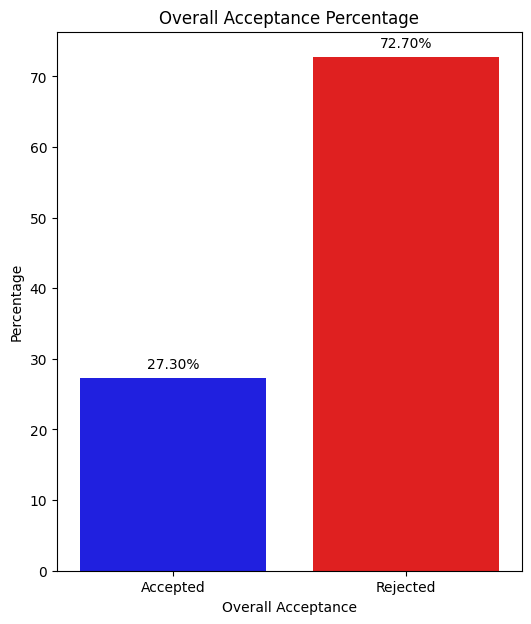

In [28]:

acceptance_counts = sc['Overall_Acceptance'].value_counts()

total_samples = len(sc['Overall_Acceptance'])
percentage_accepted = (acceptance_counts[1] / total_samples) * 100
percentage_rejected = (acceptance_counts[0] / total_samples) * 100

plt.figure(figsize=(6, 7))
ax = sns.barplot(x=['Accepted', 'Rejected'], y=[percentage_accepted, percentage_rejected], palette=['blue', 'red'])

plt.xlabel('Overall Acceptance')
plt.ylabel('Percentage')
plt.title('Overall Acceptance Percentage')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Kita bisa melihat bahwa 72,7% pelanggan tidak pernah menerima tawaran produk, artinya kampanye selama ini tidak menargetkan pelanggan tepat dan produk yang ditawarkan mungkin tidak sesuai dengan kebutuhan atau preferensi pelanggan. Hal ini terjadi karena produk dan saluran komunikasi pemasara tidak sesuai kebutuhan pelanggan. 

# Usia

Karakteristik Pelanggan yang tidak pernah menerima tawaran berdasarkan Usia Pelanggan

In [29]:
sc['Age'] = 2014 - sc['Year_Birth']
sc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Last_Campaign,Overall_Acceptance,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,0,47
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,0,1,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,1,33
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,0,58


Untuk mendapatkan data distribusi usia pelanggan yang terdaftar, yang akurat kita butuh kolom Usia, kita bisa mengurangi tahun ini 2014 dengan kolom Year_Birth.

In [30]:

ru = sc[['ID','Dt_Customer','Overall_Acceptance', 'Age','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases',	'NumCatalogPurchases',
'NumStorePurchases']]
bins = [18, 26, 36, 46, 56, 66, 999] 
labels = ['Remaja', 'Dewasa Awal', 'Dewasa Akhir', 'Lansia Awal', 'Lansia Akhir', 'Manula']
ru['Kategori_Usia'] = pd.cut(ru['Age'], bins=bins, right=False, labels=labels)
ru


C:\Users\User\AppData\Local\Temp\ipykernel_6928\4039289135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ru['Kategori_Usia'] = pd.cut(ru['Age'], bins=bins, right=False, labels=labels)


,ID,Dt_Customer,Overall_Acceptance,Age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kategori_Usia
0,5524,2012-09-04,1,57,635,88,546,172,88,88,8,10,4,Lansia Akhir
1,2174,2014-03-08,0,60,11,1,6,2,1,6,1,1,2,Lansia Akhir
2,4141,2013-08-21,0,49,426,49,127,111,21,42,8,2,10,Lansia Awal
3,6182,2014-02-10,0,30,11,4,20,10,3,5,2,0,4,Dewasa Awal
4,5324,2014-01-19,0,33,173,43,118,46,27,15,5,3,6,Dewasa Awal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,0,47,709,43,182,42,118,247,9,3,4,Lansia Awal
2236,4001,2014-06-10,1,68,406,0,30,0,0,8,8,2,5,Manula
2237,7270,2014-01-25,1,33,908,48,217,32,12,24,2,3,13,Dewasa Awal
2238,8235,2014-01-24,0,58,428,30,214,80,30,61,6,5,10,Lansia Akhir


Lalu kita buat kolom baru untuk mempermudah identfikasi pelanggan berdasarkan usia, kategori yang digunakan pada analisa ini adalah kategori usia World Health Organization 2019.

In [31]:
df_ru=pd.crosstab(ru['Kategori_Usia'],ru['Overall_Acceptance'])
df_ru['Total']=df_ru.sum(axis=1)
df_ru

Overall_Acceptance,0,1,Total
Kategori_Usia,,,
Remaja,65,27,92
Dewasa Awal,274,109,383
Dewasa Akhir,564,186,750
Lansia Awal,355,127,482
Lansia Akhir,304,129,433
Manula,49,27,76


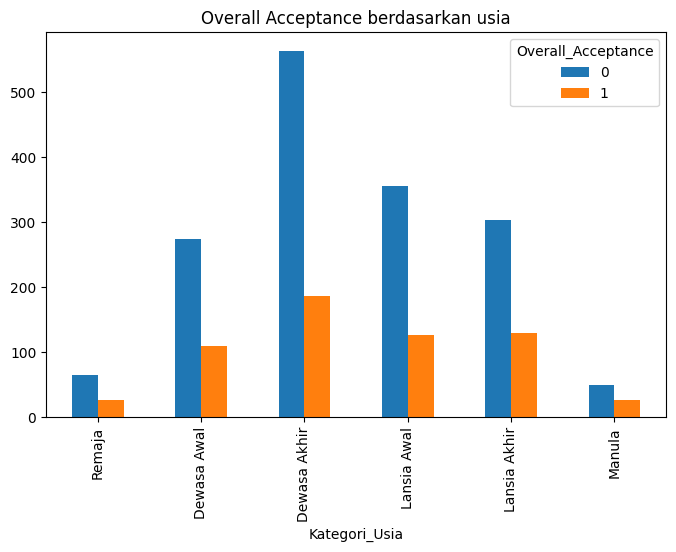

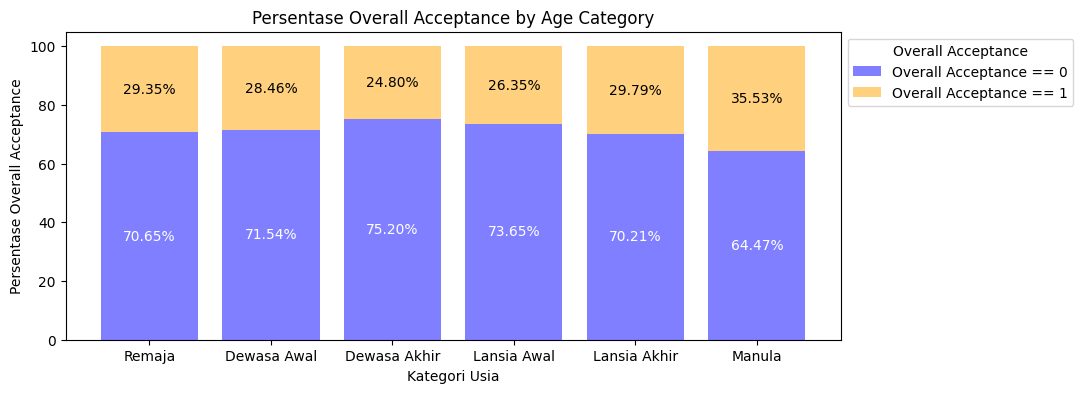

In [32]:

df_ru.drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Overall Acceptance berdasarkan usia')

plt.show()


data = {
    'Kategori_Usia': ['Remaja', 'Dewasa Awal', 'Dewasa Akhir', 'Lansia Awal', 'Lansia Akhir', 'Manula'],
    '0': [65, 274, 564, 355, 304, 49],
    '1': [27, 109, 186, 127, 129, 27]
}

df = pd.DataFrame(data)
df['Overall_Acceptance'] = df['0'] + df['1'] 

df['Persentase_0'] = df['0'] / df['Overall_Acceptance'] * 100
df['Persentase_1'] = df['1'] / df['Overall_Acceptance'] * 100


plt.figure(figsize=(10, 4))


bars_0 = plt.bar(np.arange(len(df['Kategori_Usia'])), df['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)

bars_1 = plt.bar(np.arange(len(df['Kategori_Usia'])), df['Persentase_1'], bottom=df['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, df['Persentase_0'], df['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Kategori Usia')
plt.ylabel('Persentase Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(df['Kategori_Usia'])), df['Kategori_Usia'])
plt.title('Persentase Overall Acceptance by Age Category')


plt.show()


In [33]:

ru['Dt_Customer'] = pd.to_datetime(ru['Dt_Customer'])
ru['Hari'] = ru['Dt_Customer'].dt.day_name()
ru


C:\Users\User\AppData\Local\Temp\ipykernel_6928\1073653008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ru['Dt_Customer'] = pd.to_datetime(ru['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_6928\1073653008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ru['Hari'] = ru['Dt_Customer'].dt.day_name()


,ID,Dt_Customer,Overall_Acceptance,Age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kategori_Usia,Hari
0,5524,2012-09-04,1,57,635,88,546,172,88,88,8,10,4,Lansia Akhir,Tuesday
1,2174,2014-03-08,0,60,11,1,6,2,1,6,1,1,2,Lansia Akhir,Saturday
2,4141,2013-08-21,0,49,426,49,127,111,21,42,8,2,10,Lansia Awal,Wednesday
3,6182,2014-02-10,0,30,11,4,20,10,3,5,2,0,4,Dewasa Awal,Monday
4,5324,2014-01-19,0,33,173,43,118,46,27,15,5,3,6,Dewasa Awal,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2013-06-13,0,47,709,43,182,42,118,247,9,3,4,Lansia Awal,Thursday
2236,4001,2014-06-10,1,68,406,0,30,0,0,8,8,2,5,Manula,Tuesday
2237,7270,2014-01-25,1,33,908,48,217,32,12,24,2,3,13,Dewasa Awal,Saturday
2238,8235,2014-01-24,0,58,428,30,214,80,30,61,6,5,10,Lansia Akhir,Friday


In [34]:
result = ru[ru['Overall_Acceptance'] == 0].groupby(['Kategori_Usia']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()


result



C:\Users\User\AppData\Local\Temp\ipykernel_6928\2470416743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = ru[ru['Overall_Acceptance'] == 0].groupby(['Kategori_Usia']).agg(


,Kategori_Usia,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,Remaja,63,55,65,62,58,65
1,Dewasa Awal,271,238,274,239,235,267
2,Dewasa Akhir,559,458,563,467,467,547
3,Lansia Awal,354,273,355,279,271,347
4,Lansia Akhir,303,245,304,250,234,294
5,Manula,49,45,49,41,41,48


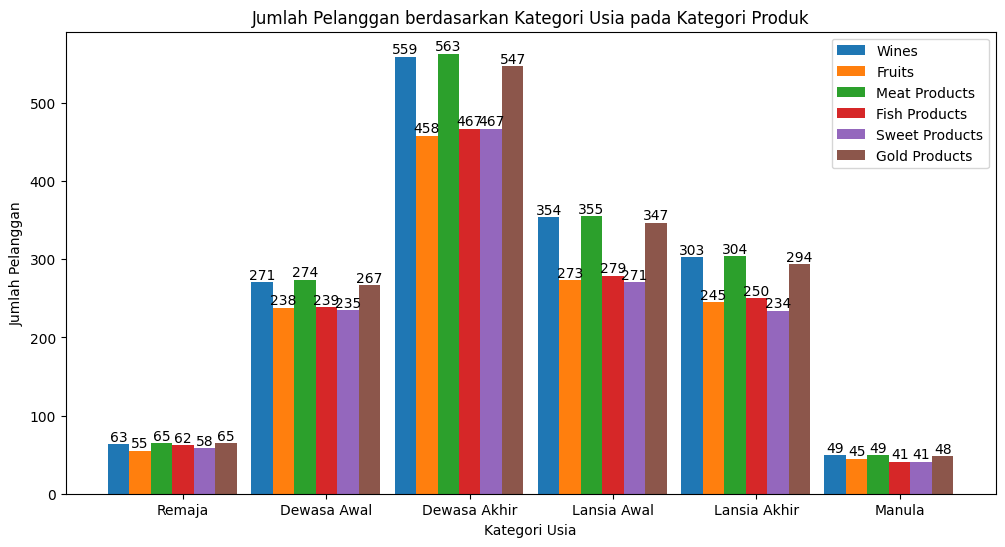

In [35]:



kategori_usia = ['Remaja', 'Dewasa Awal', 'Dewasa Akhir', 'Lansia Awal', 'Lansia Akhir', 'Manula']
mntWines = [63, 271, 559, 354, 303, 49]
mntFruits = [55, 238, 458, 273, 245, 45]
mntMeatProducts = [65, 274, 563, 355, 304, 49]
mntFishProducts = [62, 239, 467, 279, 250, 41]
mntSweetProducts = [58, 235, 467, 271, 234, 41]
mntGoldProds = [65, 267, 547, 347, 294, 48]

bar_width = 0.15
index = np.arange(len(kategori_usia))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Kategori Usia')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Kategori Usia pada Kategori Produk')
ax.set_xticks(index + 3*bar_width)
ax.set_xticklabels(kategori_usia)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


In [36]:
result = ru[ru['Overall_Acceptance'] == 0].groupby(['Kategori_Usia']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

result

C:\Users\User\AppData\Local\Temp\ipykernel_6928\392777449.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = ru[ru['Overall_Acceptance'] == 0].groupby(['Kategori_Usia']).agg(


,Kategori_Usia,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,Remaja,64,38,64
1,Dewasa Awal,262,140,273
2,Dewasa Akhir,549,356,557
3,Lansia Awal,345,260,353
4,Lansia Akhir,297,237,303
5,Manula,47,44,48


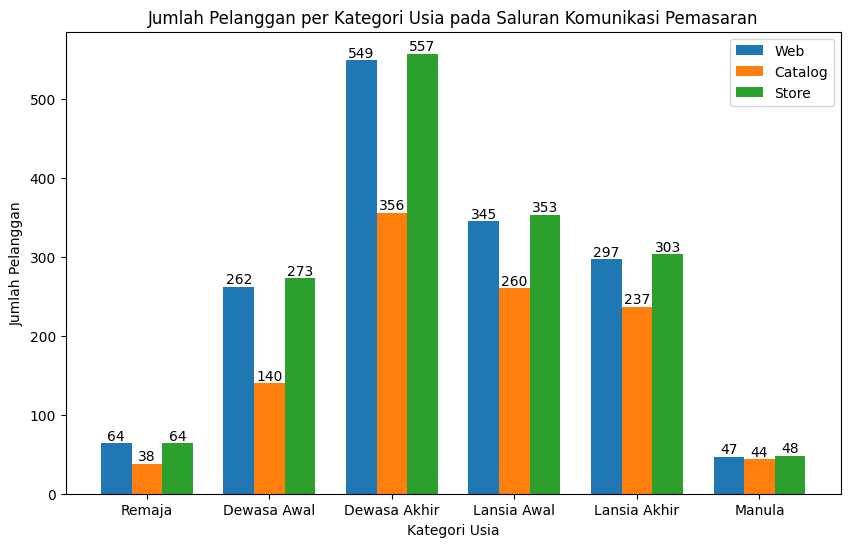

In [37]:

kategori_usia = ['Remaja', 'Dewasa Awal', 'Dewasa Akhir', 'Lansia Awal', 'Lansia Akhir', 'Manula']
pelanggan_web = [64, 262, 549, 345, 297, 47]
pelanggan_catalog = [38, 140, 356, 260, 237, 44]
pelanggan_store = [64, 273, 557, 353, 303, 48]


bar_width = 0.25
index = np.arange(len(kategori_usia))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, pelanggan_web, bar_width, label='Web')
bar2 = ax.bar(index, pelanggan_catalog, bar_width, label='Catalog')
bar3 = ax.bar(index + bar_width, pelanggan_store, bar_width, label='Store')


ax.set_xlabel('Kategori Usia')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan per Kategori Usia pada Saluran Komunikasi Pemasaran')
ax.set_xticks(index)
ax.set_xticklabels(kategori_usia)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()


Bisa disimpulkan bahwa :

1. Jumlah pelanggan di kategori Dewasa Akhir dan Lansia Awal dan Lansia Akhir menjadi pelanggan dengan penolakan terhadap penawaran yang paling tinggi, dibandingkan Remaja dan Manula.

2. Secara proporsi pelanggan pada kategori Dewasa Akhir  presentase penerimaan penawarannya 28% , Lansia Awal  presentase penerimaan penawaran 26% dan Lansia Akhir presentase penerimaan  penawaran 25%  artinya strategi yang tepat harus dibuat agar penerimaan penawaran meningkat.
 
3. Kategori Produk yang paling diminati pelanggan di kategori Dewasa Akhir adalah Wine 559 pelanggan, Meat 563 pelanggan dan Gold 547 pelanggan.

4. Kategori Produk yang paling diminati pelanggan di kategori Lansia Awal adalah Wine 354 pelanggan, Meat 355 pelanggan dan Gold 347 pelanggan.

5. Kategori Produk yang paling diminati pelanggan di kategori Lansia Akhir adalah Wine 303 pelanggan, Meat 304 pelanggan dan Gold 294 pelanggan.



Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:



1. Pada Pelanggan di kategori Dewasa Akhir:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori Dewasa Akhir dengan produk yang kurang diminati seperti buah-buahan dan permen
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls

- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan Dewasa Akhir yang lebih memilih bertransaksi  di Toko Langsung dan Web.


2. Pada Pelanggan Dikategori Lansia Awal

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori Lansia Awal, dengan produk yang kurang diminati seperti buah-buahan dan permen
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan Lansia Awal yang lebih memilih bertransaksi  di Toko Langsung dan Web.

3. Pada Pelanggan Dikategoria Lansia Akhir

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori Lansia Akhir, dengan produk yang kurang diminati seperti buah-buahan dan permen
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls

- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan Lansia Akhir yang lebih memilih bertransaksi  di Toko Langsung dan Web.




# Kelas Ekonomi 
Untuk menentukan kelas ekonomi berdasarkan Pew Research tahun 2014 maka kita harus membuat kolom family size yang menampilkan jumlah anggota keluarga, karena kelas ekonomi dikategorikan berdasarkan pendapatan dan  jumlah anggota keluarga.

# Jumlah Anggota Keluarga

In [38]:
fs= sc[['ID','Marital_Status','Kidhome','Teenhome','Overall_Acceptance','Income']]
fs

,ID,Marital_Status,Kidhome,Teenhome,Overall_Acceptance,Income
0,5524,Single,0,0,1,58138.0
1,2174,Single,1,1,0,46344.0
2,4141,Together,0,0,0,71613.0
3,6182,Together,1,0,0,26646.0
4,5324,Married,1,0,0,58293.0
...,...,...,...,...,...,...
2235,10870,Married,0,1,0,61223.0
2236,4001,Together,2,1,1,64014.0
2237,7270,Divorced,0,0,1,56981.0
2238,8235,Together,0,1,0,69245.0


In [39]:

fs['Marital_Status'] = fs['Marital_Status'].replace({'Single': 1, 'Widow': 1, 'Divorced': 1, 'Together': 2, 'Married': 2})

fs['family_size'] = fs['Marital_Status'] +fs['Kidhome'] + fs['Teenhome']

fs


C:\Users\User\AppData\Local\Temp\ipykernel_6928\594895371.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fs['Marital_Status'] = fs['Marital_Status'].replace({'Single': 1, 'Widow': 1, 'Divorced': 1, 'Together': 2, 'Married': 2})
C:\Users\User\AppData\Local\Temp\ipykernel_6928\594895371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs['Marital_Status'] = fs['Marital_Status'].replace({'Single': 1, 'Widow': 1, 'Divorced': 1, 'Together': 2, 'Married': 2})
C:\Users\User\AppData\Local\Temp\ipykernel_6928\594895371.

,ID,Marital_Status,Kidhome,Teenhome,Overall_Acceptance,Income,family_size
0,5524,1,0,0,1,58138.0,1
1,2174,1,1,1,0,46344.0,3
2,4141,2,0,0,0,71613.0,2
3,6182,2,1,0,0,26646.0,3
4,5324,2,1,0,0,58293.0,3
...,...,...,...,...,...,...,...
2235,10870,2,0,1,0,61223.0,3
2236,4001,2,2,1,1,64014.0,5
2237,7270,1,0,0,1,56981.0,1
2238,8235,2,0,1,0,69245.0,3


# Kelas Ekonomi
Setelah jumlah anggota keluarga diketahui maka kita akan mengelompokkan pelanggan sesuai dengan kelas ekonominya.

In [40]:
def determine_ecoclass(row):
    if row['family_size'] == 1:
        if row['Income'] < 24173:
            return 'lower'
        elif row['Income'] > 72521:
            return 'upper'
        else:
            return 'middle'
    elif row['family_size'] == 2:
        if row['Income'] < 34186:
            return 'lower'
        elif row['Income'] > 102560:
            return 'upper'
        else:
            return 'middle'
    elif row['family_size'] == 3:
        if row['Income'] < 41869:
            return 'lower'
        elif row['Income'] > 125609:
            return 'upper'
        else:
            return 'middle'
    elif row['family_size'] == 4:
        if row['Income'] < 48347:
            return 'lower'
        elif row['Income'] > 145041:
            return 'upper'
        else:
            return 'middle'
    elif row['family_size'] == 5:
        if row['Income'] < 54053:
            return 'lower'
        elif row['Income'] > 162161:
            return 'upper'
        else:
            return 'middle'
    else:
        return 'undefined'


fs['ecoclass'] = fs.apply(lambda row: determine_ecoclass(row), axis=1)


fs


C:\Users\User\AppData\Local\Temp\ipykernel_6928\3634205999.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs['ecoclass'] = fs.apply(lambda row: determine_ecoclass(row), axis=1)


,ID,Marital_Status,Kidhome,Teenhome,Overall_Acceptance,Income,family_size,ecoclass
0,5524,1,0,0,1,58138.0,1,middle
1,2174,1,1,1,0,46344.0,3,middle
2,4141,2,0,0,0,71613.0,2,middle
3,6182,2,1,0,0,26646.0,3,lower
4,5324,2,1,0,0,58293.0,3,middle
...,...,...,...,...,...,...,...,...
2235,10870,2,0,1,0,61223.0,3,middle
2236,4001,2,2,1,1,64014.0,5,middle
2237,7270,1,0,0,1,56981.0,1,middle
2238,8235,2,0,1,0,69245.0,3,middle


In [41]:
df_i=pd.crosstab(fs['ecoclass'],fs['Overall_Acceptance'])
df_i['Total']=df_i.sum(axis=1)
df_i.sort_values('Total',ascending=False)

Overall_Acceptance,0,1,Total
ecoclass,,,
middle,923,404,1327
lower,640,120,760
upper,48,81,129


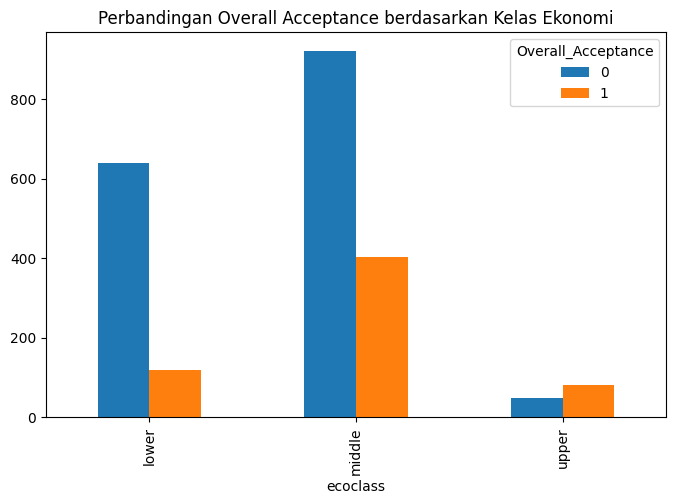

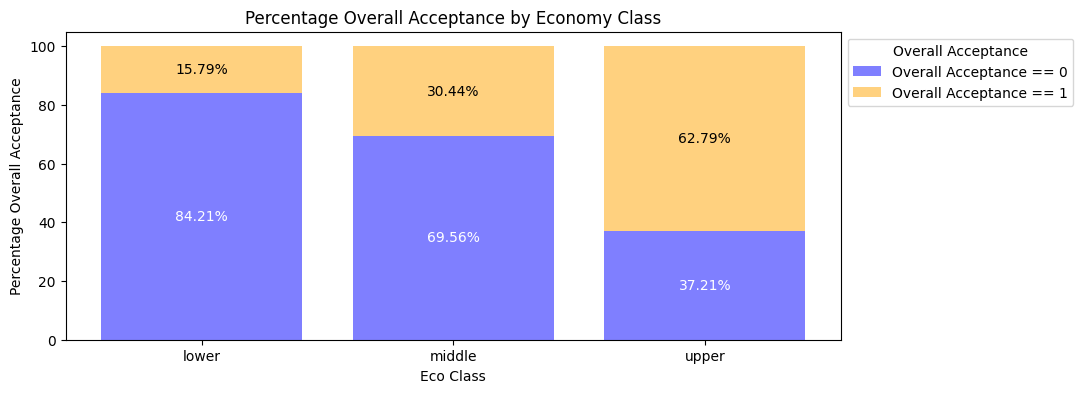

In [42]:

df_i.drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Perbandingan Overall Acceptance berdasarkan Kelas Ekonomi')
plt.show()


data = {'ecoclass': ['lower', 'middle', 'upper'],
        'Overall_Acceptance_0': [640, 923, 48],
        'Overall_Acceptance_1': [120, 404, 81]}

dfi = pd.DataFrame(data)

dfi['Overall_Acceptance'] = dfi['Overall_Acceptance_0'] + dfi['Overall_Acceptance_1']

dfi['Persentase_0'] = dfi['Overall_Acceptance_0'] / dfi['Overall_Acceptance'] * 100
dfi['Persentase_1'] = dfi['Overall_Acceptance_1'] / dfi['Overall_Acceptance'] * 100

plt.figure(figsize=(10, 4))


bars_0 = plt.bar(np.arange(len(dfi['ecoclass'])), dfi['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)


bars_1 = plt.bar(np.arange(len(dfi['ecoclass'])), dfi['Persentase_1'], bottom=dfi['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, dfi['Persentase_0'], dfi['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Eco Class')
plt.ylabel('Percentage Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(dfi['ecoclass'])), dfi['ecoclass'])
plt.title('Percentage Overall Acceptance by Economy Class')

plt.show()


In [43]:


df_mergedi = sc[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Overall_Acceptance']]


df_mergedi = pd.merge(df_mergedi, fs[['ID', 'ecoclass']], on='ID')
df_mergedi


,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Overall_Acceptance,ecoclass
0,5524,635,88,546,172,88,88,8,10,4,1,middle
1,2174,11,1,6,2,1,6,1,1,2,0,middle
2,4141,426,49,127,111,21,42,8,2,10,0,middle
3,6182,11,4,20,10,3,5,2,0,4,0,lower
4,5324,173,43,118,46,27,15,5,3,6,0,middle
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,709,43,182,42,118,247,9,3,4,0,middle
2212,4001,406,0,30,0,0,8,8,2,5,1,middle
2213,7270,908,48,217,32,12,24,2,3,13,1,middle
2214,8235,428,30,214,80,30,61,6,5,10,0,middle


In [44]:
resulti = df_mergedi[df_mergedi['Overall_Acceptance'] == 0].groupby(['ecoclass']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()


resulti

,ecoclass,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,lower,628,479,639,489,478,621
1,middle,923,788,923,801,781,899
2,upper,48,47,48,48,47,48


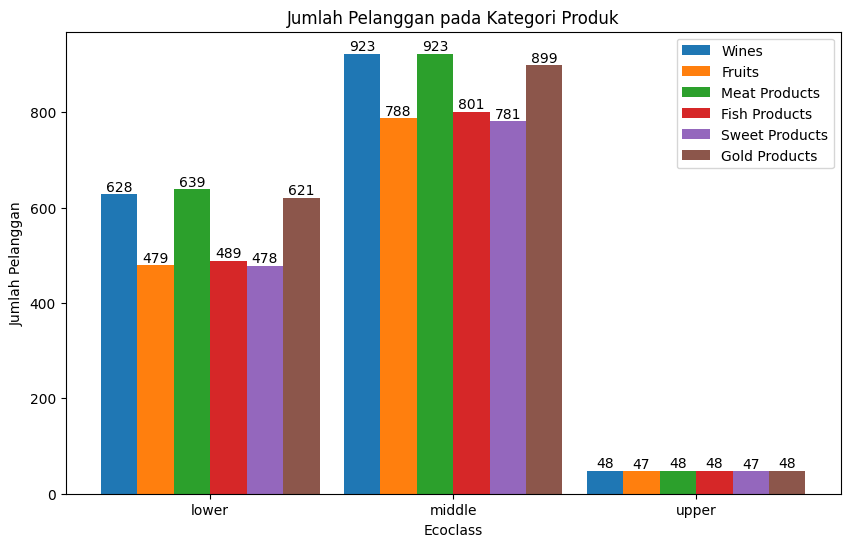

In [45]:

ecoclass = ['lower', 'middle', 'upper']
mntWines = [628, 923, 48]
mntFruits = [479, 788, 47]
mntMeatProducts = [639, 923, 48]
mntFishProducts = [489, 801, 48]
mntSweetProducts = [478, 781, 47]
mntGoldProds = [621, 899, 48]


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')


bar_width = 0.15
index = np.arange(len(ecoclass))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Ecoclass')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan pada Kategori Produk')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(ecoclass)
ax.legend()

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


In [46]:
resultip = df_mergedi[df_mergedi['Overall_Acceptance'] == 0].groupby(['ecoclass']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

resultip

,ecoclass,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,lower,606,205,632
1,middle,916,827,923
2,upper,42,43,43


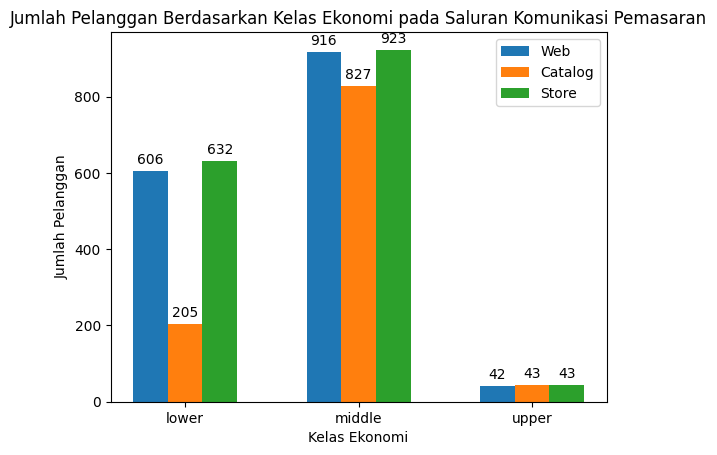

In [47]:

data = {'ecoclass': ['lower', 'middle', 'upper'],
        'Jumlah_Pelanggan_Web': [606, 916, 42],
        'Jumlah_Pelanggan_Catalog': [205, 827, 43],
        'Jumlah_Pelanggan_Store': [632, 923, 43]}

df = pd.DataFrame(data)

bar_width = 0.2
index = np.arange(len(resultip['ecoclass']))

fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width, df['Jumlah_Pelanggan_Web'], bar_width, label='Web')
bar2 = ax.bar(index, df['Jumlah_Pelanggan_Catalog'], bar_width, label='Catalog')
bar3 = ax.bar(index + bar_width, df['Jumlah_Pelanggan_Store'], bar_width, label='Store')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

ax.set_xlabel('Kelas Ekonomi')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan Berdasarkan Kelas Ekonomi pada Saluran Komunikasi Pemasaran')
ax.set_xticks(index)
ax.set_xticklabels(df['ecoclass'])
ax.legend()

plt.show()





Kita bisa melihat:
1. Jumlah penolakan penawaran pelanggan di kategori lower dan middel lebih tingi dibandingkan pelanggan dikategori upper.
2. Secara proporsi pelanggan di kategori lower dan middle persentase penerimaan penawaran sangat rendah, maka harus dibuat strategi pemasaran yang tepat.
3. Kategori produk yang paling diminati pelanggan dikategori Lower adalah Wines dengan 628 pelanggan, Meat dengan 639 dan Gold dengan jumlah pelanggan 621.
4. Kategori produk yang paling diminati pelanggan dikategori Middle adalah Wines dengan 923 pelanggan, Meat dengan 923 dan Gold dengan jumlah pelanggan 899.
5. Saluran komunikasi yang populer adalah Toko Langsung dan Web.

Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:

1. Pada Pelanggan di Kelas Ekonomi Lower.

- Bundle produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yang Lower, dengan produk yang kurang diminati yaitu produk Permen dan produk Buah-buahan.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls

- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori yang tidak memiliki anak yang lebih memilih bertransaksi  di Toko Langsung dan Web.

2. Pada Pelanggan di Kelas Ekonomi Middle:

- Bundle produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori middle, dengan prodok yang kurang diminati seperti Permen dan buah-buahan.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls

- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori middle yang lebih memilih bertransaksi  di Toko Langsung dan Web.

# Marital Status
Karakteristik pelanggan yang tidak pernah menerima tawaran berdasarkan status pernikahan

In [48]:
df_sc=pd.crosstab(sc['Marital_Status'],sc['Overall_Acceptance'])
df_sc['Total']=df_sc.sum(axis=1)
df_sc.sort_values('Total',ascending=False)

Overall_Acceptance,0,1,Total
Marital_Status,,,
Married,641,216,857
Together,429,144,573
Single,328,150,478
Divorced,163,69,232
Widow,50,26,76


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


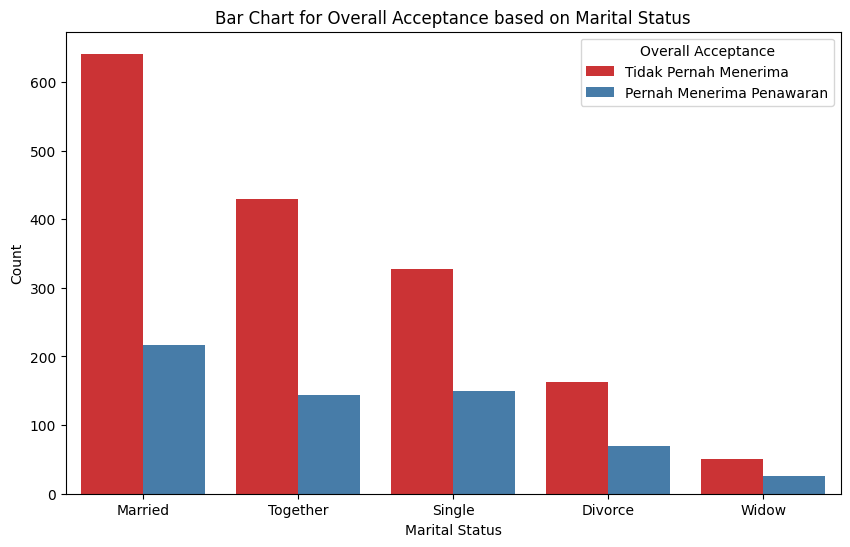

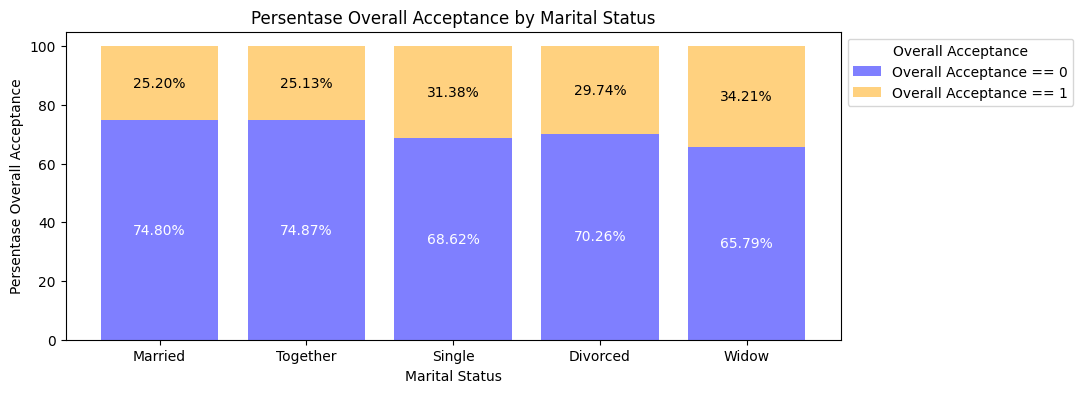

In [49]:

data = {
    'Marital Status': ['Married', 'Together', 'Single', 'Divorce', 'Widow'],
    'Tidak Pernah Menerima': [641, 429, 328, 163, 50],
    'Pernah Menerima Penawaran': [216, 144, 150, 69, 26]
}

df = pd.DataFrame(data)


df_melted = pd.melt(df, id_vars=['Marital Status'], var_name='Overall Acceptance', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital Status', y='Count', hue='Overall Acceptance', data=df_melted, palette='Set1')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Bar Chart for Overall Acceptance based on Marital Status')
plt.show()



marital_status_data = {
    'Marital_Status': ['Married', 'Together', 'Single', 'Divorced', 'Widow'],
    '0': [641, 429, 328, 163, 50],
    '1': [216, 144, 150, 69, 26]
}

df_marital = pd.DataFrame(marital_status_data)
df_marital['Overall_Acceptance'] = df_marital['0'] + df_marital['1']

df_marital['Persentase_0'] = df_marital['0'] / df_marital['Overall_Acceptance'] * 100
df_marital['Persentase_1'] = df_marital['1'] / df_marital['Overall_Acceptance'] * 100

plt.figure(figsize=(10, 4))


bars_0 = plt.bar(np.arange(len(df_marital['Marital_Status'])), df_marital['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)

bars_1 = plt.bar(np.arange(len(df_marital['Marital_Status'])), df_marital['Persentase_1'], bottom=df_marital['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, df_marital['Persentase_0'], df_marital['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Marital Status')
plt.ylabel('Persentase Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(df_marital['Marital_Status'])), df_marital['Marital_Status'])
plt.title('Persentase Overall Acceptance by Marital Status')

plt.show()




In [50]:
resultms = sc[sc['Overall_Acceptance'] == 0].groupby(['Marital_Status']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()


resultms

,Marital_Status,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,Divorced,160,138,162,139,137,158
1,Married,636,520,641,537,522,625
2,Single,325,272,328,264,258,320
3,Together,428,345,429,356,350,415
4,Widow,50,39,50,42,39,50


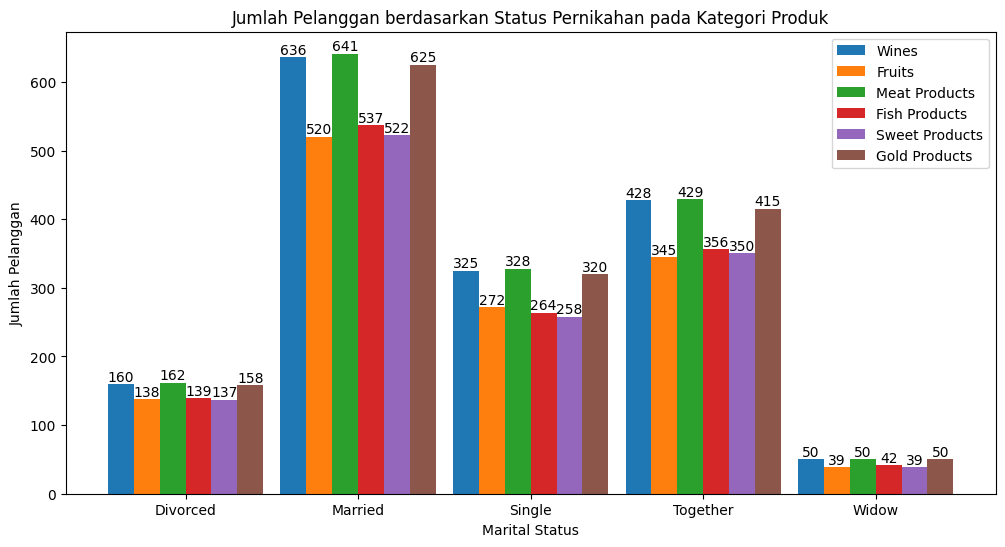

In [51]:



marital_status = ['Divorced', 'Married', 'Single', 'Together', 'Widow']
mntWines = [160, 636, 325, 428, 50]
mntFruits = [138, 520, 272, 345, 39]
mntMeatProducts = [162, 641, 328, 429, 50]
mntFishProducts = [139, 537, 264, 356, 42]
mntSweetProducts = [137, 522, 258, 350, 39]
mntGoldProds = [158, 625, 320, 415, 50]


bar_width = 0.15
index = np.arange(len(marital_status))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Status Pernikahan pada Kategori Produk')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(marital_status)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


In [52]:
resultmsp = sc[sc['Overall_Acceptance'] == 0].groupby(['Marital_Status']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

resultmsp

,Marital_Status,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,Divorced,156,105,160
1,Married,624,417,635
2,Single,320,218,325
3,Together,415,294,428
4,Widow,49,41,50


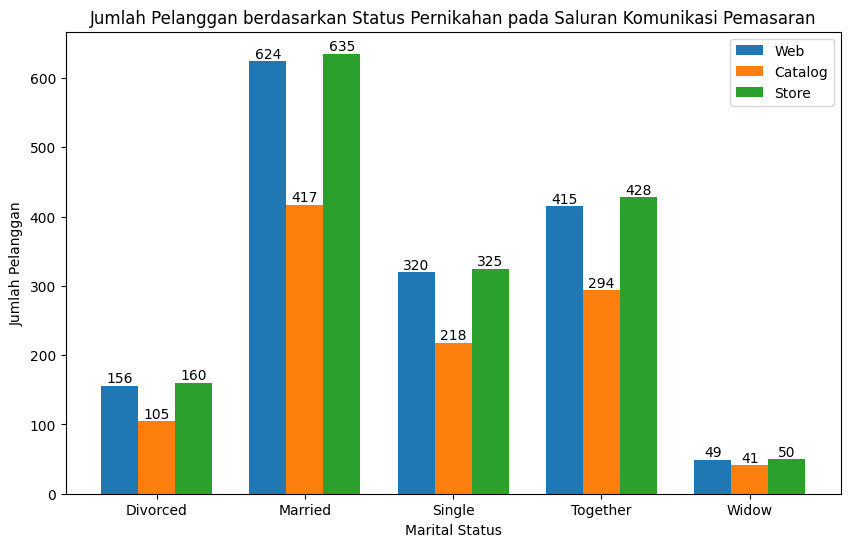

In [53]:



marital_status = ['Divorced', 'Married', 'Single', 'Together', 'Widow']
pelanggan_web = [156, 624, 320, 415, 49]
pelanggan_catalog = [105, 417, 218, 294, 41]
pelanggan_store = [160, 635, 325, 428, 50]


bar_width = 0.25
index = np.arange(len(marital_status))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, pelanggan_web, bar_width, label='Web')
bar2 = ax.bar(index, pelanggan_catalog, bar_width, label='Catalog')
bar3 = ax.bar(index + bar_width, pelanggan_store, bar_width, label='Store')


ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Status Pernikahan pada Saluran Komunikasi Pemasaran')
ax.set_xticks(index)
ax.set_xticklabels(marital_status)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()


Bisa disimpulkan bahwa :

1. Jumlah pelanggan di umur pertengahan Married dan Together menjadi pelanggan dengan penolakan terhadap penawaran yang paling tinggi, dibandingkan pelanggan di kategori Single, Divorced, Widow.

2. Secara proporsi dikategori Married persentase penawarannya dan dikategori Together 25% artinya strategi pemasaran yang tepat harus dibuat untuk meningkatkan penerimaan penwaran.
3. Kategori Produk yang paling diminati pelanggan di kategori Married adalah Wine 636 pelanggan, Meat 641 pelanggan dan Gold 625 pelanggan.
4. Kategori Produk yang paling diminati pelanggan di kategori Together adalah Wine 428 pelanggan, Meat 429 pelanggan dan Gold 415 pelanggan.


Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:

1. Pada Pelanggan di kategori Married:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yang Married, dengan produk yang kurang diminati seperti buah-buahan dan permen
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls

- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori Married yang lebih memilih bertransaksi  di Toko Langsung dan Web.

2. Pada Pelanggan di kategori Together:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori Together dengan produk yang kurang diminati seperti buah-buahan dan permen.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori Together yang lebih memilih bertransaksi  di Toko Langsung dan Web.








# Education
Karakteristik pelanggan yang tidak pernah menerima tawaran berdasarkan Tingkat Pendidikan
Hal ini penting dianalisa karena Berdasarkan teori Hirarki Kebutuhan Maslow, menyatakan bahwa orang memiliki kebutuhan hierarkis, dan tingkat pendidikan dapat memengaruhi kebutuhan ini. Produk yang memenuhi kebutuhan pada tingkat pendidikan yang lebih tinggi mungkin memiliki daya tarik yang berbeda

In [54]:
df_sc=pd.crosstab(sc['Education'],sc['Overall_Acceptance'])
df_sc['Total']=df_sc.sum(axis=1)
df_sc

Overall_Acceptance,0,1,Total
Education,,,
Basic,47,7,54
Graduation,820,296,1116
Master,421,144,565
PhD,323,158,481


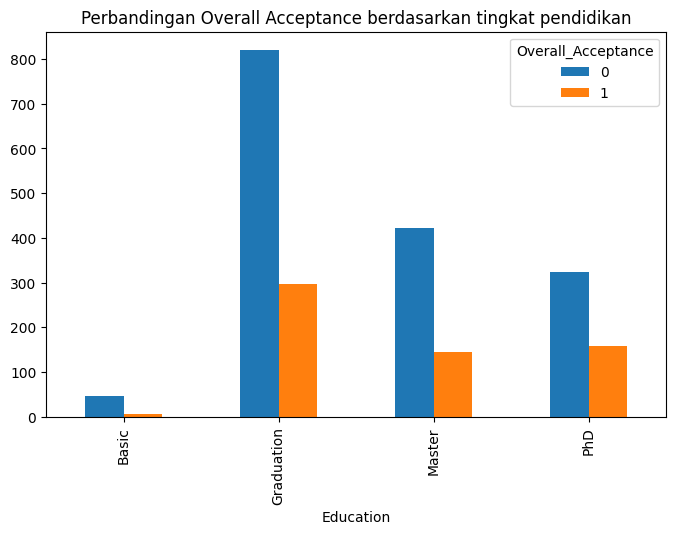

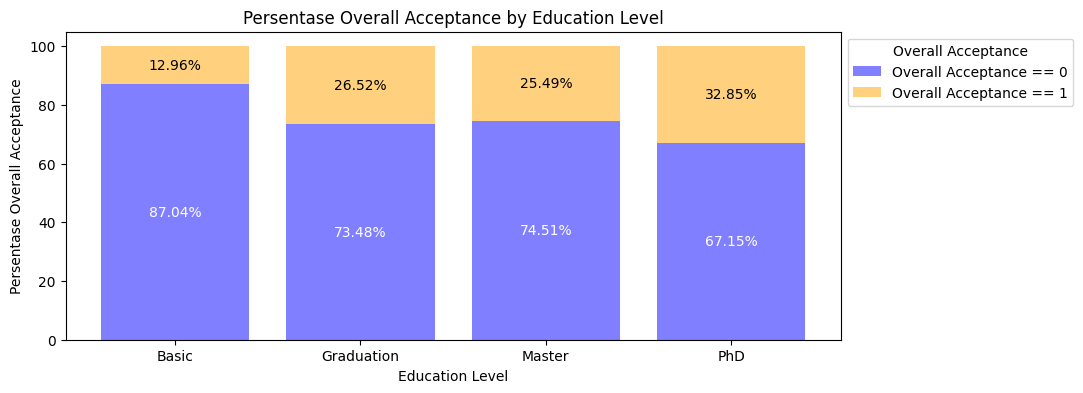

In [55]:

df_sc.drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Perbandingan Overall Acceptance berdasarkan tingkat pendidikan')
plt.show()



edu = {
    'Education': ['Basic','Graduation', 'Master', 'PhD', ],
    '0': [47,820, 421, 323],
    '1': [7,296, 144, 158]
}

df_sc = pd.DataFrame(edu)
df_sc['Overall_Acceptance'] = df_sc['0'] + df_sc['1']

df_sc['Persentase_0'] = df_sc['0'] / df_sc['Overall_Acceptance'] * 100
df_sc['Persentase_1'] = df_sc['1'] / df_sc['Overall_Acceptance'] * 100

plt.figure(figsize=(10, 4))

# Plotting bar chart for Overall Acceptance == 0
bars_0 = plt.bar(np.arange(len(df_sc['Education'])), df_sc['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)

# Adding data for Overall Acceptance == 1
bars_1 = plt.bar(np.arange(len(df_sc['Education'])), df_sc['Persentase_1'], bottom=df_sc['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, df_sc['Persentase_0'], df_sc['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Education Level')
plt.ylabel('Persentase Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(df_sc['Education'])), df_sc['Education'])
plt.title('Persentase Overall Acceptance by Education Level')

plt.show()


In [56]:
resultedu = sc[sc['Overall_Acceptance'] == 0].groupby(['Education']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()

# Menampilkan hasil
resultedu

,Education,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,Basic,42,44,47,45,44,47
1,Graduation,817,704,820,726,706,809
2,Master,417,353,420,344,339,412
3,PhD,323,213,323,223,217,300


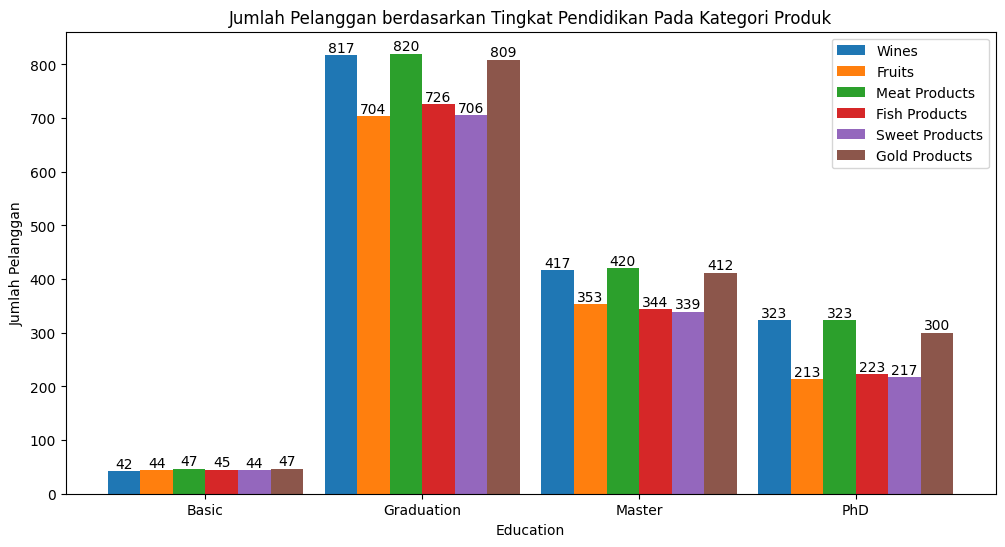

In [57]:


education = ['Basic', 'Graduation', 'Master', 'PhD']
mntWines = [42, 817, 417, 323]
mntFruits = [44, 704, 353, 213]
mntMeatProducts = [47, 820, 420, 323]
mntFishProducts = [45, 726, 344, 223]
mntSweetProducts = [44, 706, 339, 217]
mntGoldProds = [47, 809, 412, 300]


bar_width = 0.15
index = np.arange(len(education))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Education')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Tingkat Pendidikan Pada Kategori Produk')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(education)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


In [58]:
resultmst = sc[sc['Overall_Acceptance'] == 0].groupby(['Education']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

resultmst

,Education,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,Basic,46,17,47
1,Graduation,794,551,811
2,Master,411,279,421
3,PhD,313,228,319


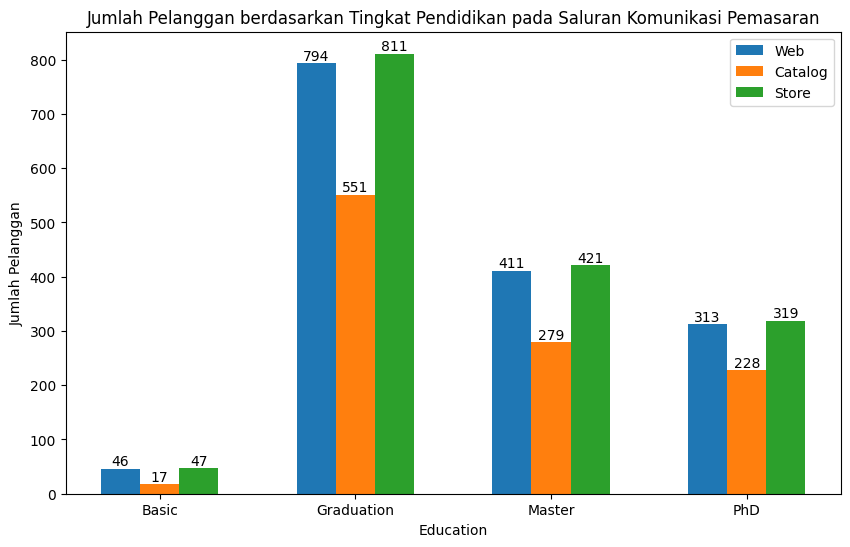

In [59]:

education = ['Basic', 'Graduation', 'Master', 'PhD']
jumlah_pelanggan_web = [46, 794, 411, 313]
jumlah_pelanggan_catalog = [17, 551, 279, 228]
jumlah_pelanggan_store = [47, 811, 421, 319]


bar_width = 0.2
index = np.arange(len(education))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, jumlah_pelanggan_web, bar_width, label='Web')
bar2 = ax.bar(index, jumlah_pelanggan_catalog, bar_width, label='Catalog')
bar3 = ax.bar(index + bar_width, jumlah_pelanggan_store, bar_width, label='Store')


ax.set_xlabel('Education')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Tingkat Pendidikan pada Saluran Komunikasi Pemasaran')
ax.set_xticks(index)
ax.set_xticklabels(education)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()


Kita bisa melihat:
1. Jumlah penolakan penawaran pada tingkat pendidikan Graduation dan Master Tinggi dibandingkan Basic dan PhD.
2. Secara proporsi penerimaan penawarannya adalah Graduation 27% dan Master 25%, artinya harus dibuat strategi pemasaran agar penerimaan penawaran meningkat.
3. Kategori Produk yang paling diminati pelanggan di kategori Graduation adalah Wine 817, Meat 820 dan Gold 809.
4. Kategori Produk yang paling diminati pelanggan di kategori Graduation adalah Wine 417, Meat 420 dan Gold 412.

Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:

1. Pada Pelanggan di kategori Graduation:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yang tidak memiliki anak, dengan produk yang kurang diminati seperti buah-buahan dan permen.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori Graduation yang lebih memilih bertransaksi  di Toko Langsung dan Web.

2. Pada Pelanggan di kategori Master:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori Master, dengan produk yang kurang diminati seperti buah-buahan dan permen.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
.
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori Master yang lebih memilih bertransaksi  di Toko Langsung dan Web.



# Jumlah Anak dan Remaja di Rumah

Menurut Philip Kotler seorang ahli dibidang Pemasaran, anak-anak  memiliki pengaruh yang kuat dalam keputusan pembelian keluarga. Sebuah survei global menunjukkan bahwa anak-anak—mulai dari bayi hingga remaja—memiliki pengaruh khusus dalam keputusan orang tua mereka terkait bagaimana uang dan waktu luang dihabiskan (71 dan 70 persen). Selain itu, mayoritas orang tua merasa bahwa anak-anak mereka memiliki pengaruh lebih besar dalam pembelian keluarga daripada yang mereka miliki sendiri saat mereka kecil.

Maka dari itu penting untuk melihat kriteria penolakan tawaran berdasarkan pelanggan yang memiliki anak dan remaja dirumah atau tidak.

# Kidhome
Karakteristik pelanggan yang tidak pernah menerima tawaran berdasarkan jumlah anak dirumah.

In [60]:
df_kh=pd.crosstab(sc['Kidhome'],sc['Overall_Acceptance'])
df_kh['Total']=df_kh.sum(axis=1)
df_kh.sort_values('Total',ascending=False)

Overall_Acceptance,0,1,Total
Kidhome,,,
0,853,430,1283
1,716,171,887
2,42,4,46


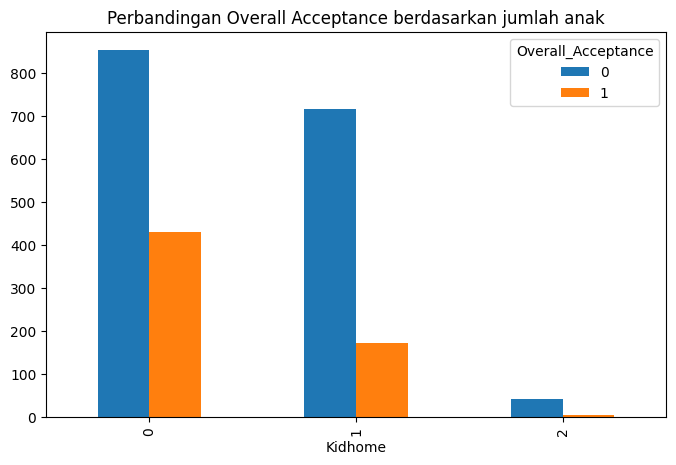

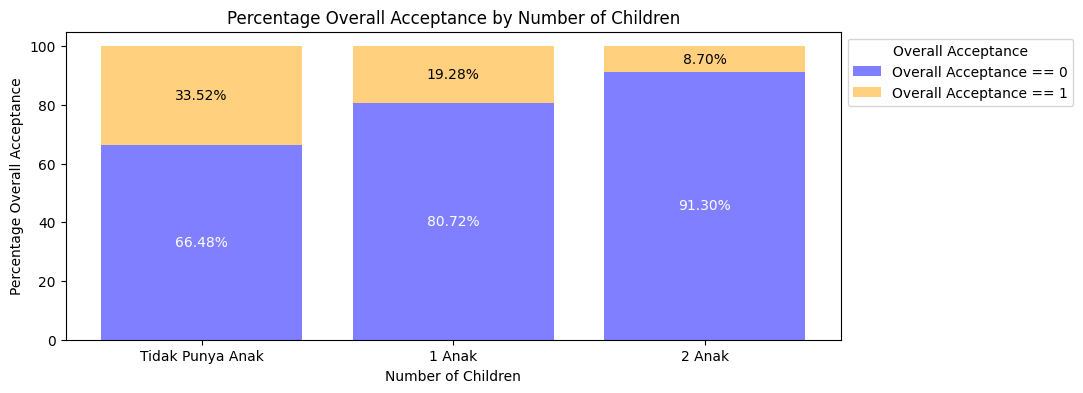

In [61]:
df_kh.drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Perbandingan Overall Acceptance berdasarkan jumlah anak')
plt.show()

data = {
    'Jumlah Anak': ['Tidak Punya Anak', '1 Anak', '2 Anak'],
    'Tidak Pernah Menerima': [853, 716, 42],
    'Pernah Menerima Penawaran': [430, 171, 4]}



df_kh = pd.DataFrame(data)
df_kh['Overall_Acceptance'] = df_kh['Tidak Pernah Menerima'] + df_kh['Pernah Menerima Penawaran']

df_kh['Persentase_0'] = df_kh['Tidak Pernah Menerima'] / df_kh['Overall_Acceptance'] * 100
df_kh['Persentase_1'] = df_kh['Pernah Menerima Penawaran'] / df_kh['Overall_Acceptance'] * 100

plt.figure(figsize=(10, 4))


bars_0 = plt.bar(np.arange(len(df_kh['Jumlah Anak'])), df_kh['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)


bars_1 = plt.bar(np.arange(len(df_kh['Jumlah Anak'])), df_kh['Persentase_1'], bottom=df_kh['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, df_kh['Persentase_0'], df_kh['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Number of Children')
plt.ylabel('Percentage Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(df_kh['Jumlah Anak'])), df_kh['Jumlah Anak'])
plt.title('Percentage Overall Acceptance by Number of Children')

plt.show()





In [62]:
resultkh = sc[sc['Overall_Acceptance'] == 0].groupby(['Kidhome']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()

# Menampilkan hasil
resultkh

,Kidhome,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,0,846,743,852,760,739,834
1,1,711,546,716,552,545,695
2,2,42,25,42,26,22,39


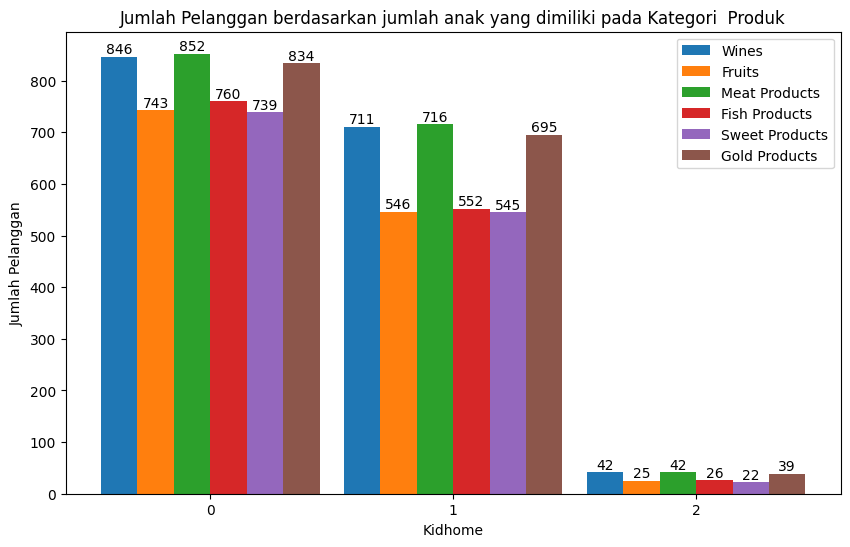

In [63]:



kidhome = [0, 1, 2]
mntWines = [846, 711, 42]
mntFruits = [743, 546, 25]
mntMeatProducts = [852, 716, 42]
mntFishProducts = [760, 552, 26]
mntSweetProducts = [739, 545, 22]
mntGoldProds = [834, 695, 39]


bar_width = 0.15
index = np.arange(len(kidhome))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Kidhome')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan jumlah anak yang dimiliki pada Kategori  Produk')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(kidhome)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


In [64]:
resultkht = sc[sc['Overall_Acceptance'] == 0].groupby(['Kidhome']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

resultkht

,Kidhome,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,0,831,743,843
1,1,693,315,713
2,2,40,17,42


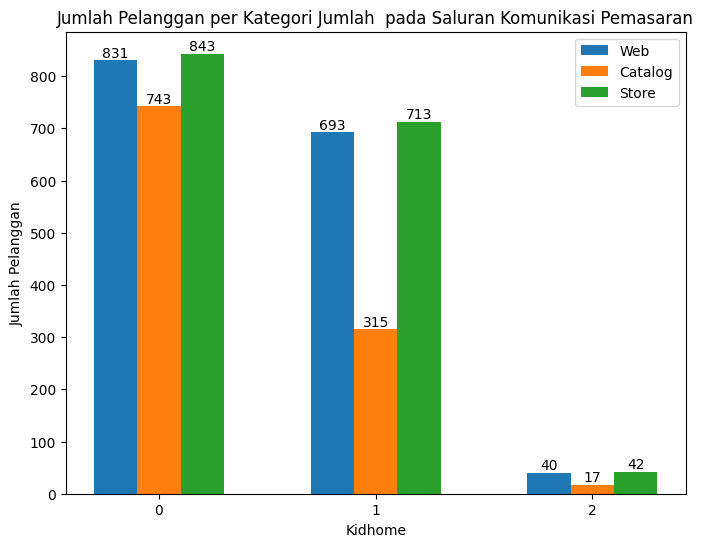

In [65]:


kidhome = [0, 1, 2]
jumlah_pelanggan_web = [831, 693, 40]
jumlah_pelanggan_catalog = [743, 315, 17]
jumlah_pelanggan_store = [843, 713, 42]


bar_width = 0.2
index = np.arange(len(kidhome))

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index, jumlah_pelanggan_web, bar_width, label='Web')
bar2 = ax.bar(index + bar_width, jumlah_pelanggan_catalog, bar_width, label='Catalog')
bar3 = ax.bar(index + 2*bar_width, jumlah_pelanggan_store, bar_width, label='Store')


ax.set_xlabel('Kidhome')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan per Kategori Jumlah  pada Saluran Komunikasi Pemasaran')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(kidhome)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()


Kita bisa melihat:
1. Jumlah penolakan penawaran pelanggan yang tidak punya anak dan pelanggan yang memiliki anak 1 lebih tinggi dibandingkan 2 anak.
2. Secara proporsi pelanggan yang tidak memiliki  anak  penerimaan tawarannya hanya 33 % dan pelanggan yang memiliki 1 anak 19% maka strategi pemasaran yang tepat harus dibuat agar penerimaan penawaran  meningkat.
3. Kategori produk yang paling diminati pelanggan di kategori yang tidak memiliki anak adalah Wines denagn 846 pelanggan,Meat dengan 852 pelanggan, dan Gold dengan 834 pelanggan.
4. Kategori produk yang paling diminati pelanggan di kategori yang tidak memiliki anak adalah Wines denagn 846 pelanggan,Meat dengan 852 pelanggan, dan Gold dengan 834 pelanggan.

Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:

1. Pada Pelanggan yang tidak memiliki anak.

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yang tidak memiliki anak, dengan produk yang kurang diminati seperti buah-buahan dan permen.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori yang tidak memiliki anak yang lebih memilih bertransaksi  di Toko Langsung dan Web.

2. Pada Pelanggan yang memiliki 1 anak:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yamng memiliki 1 anak,dengan produk yang kurang diminati seperti buah-buahan dan permen
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
-  Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori memiliki 1 anak yang lebih memilih bertransaksi  di Toko Langsung dan Web.



# Teenhome
Karakteristik pelanggan yang tidak pernah menerima tawaran berdasarkan jumlah remaja di rumah.

In [66]:
df_th=pd.crosstab(sc['Teenhome'],sc['Overall_Acceptance'])
df_th['Total']=df_th.sum(axis=1)
df_th.sort_values('Total',ascending=False)

Overall_Acceptance,0,1,Total
Teenhome,,,
0,767,380,1147
1,805,213,1018
2,39,12,51


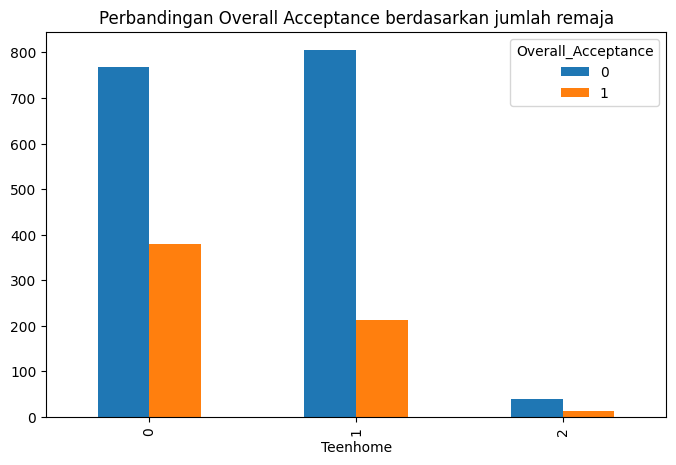

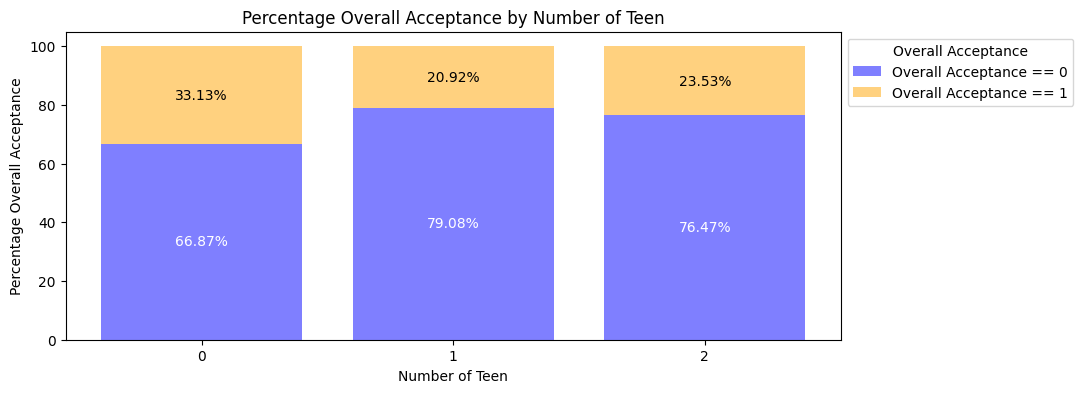

In [67]:
df_th.drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Perbandingan Overall Acceptance berdasarkan jumlah remaja')
plt.show()



data_th = {
    'Jumlah Remaja': [0, 1, 2],
    'Tidak Pernah Menerima': [767, 805, 39],
    'Pernah Menerima Penawaran': [380, 213, 12]
}

df_th = pd.DataFrame(data_th)
df_th['Overall_Acceptance'] = df_th['Tidak Pernah Menerima'] + df_th['Pernah Menerima Penawaran']

df_th['Persentase_0'] = df_th['Tidak Pernah Menerima'] / df_th['Overall_Acceptance'] * 100
df_th['Persentase_1'] = df_th['Pernah Menerima Penawaran'] / df_th['Overall_Acceptance'] * 100

plt.figure(figsize=(10, 4))


bars_0 = plt.bar(np.arange(len(df_th['Jumlah Remaja'])), df_th['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)


bars_1 = plt.bar(np.arange(len(df_th['Jumlah Remaja'])), df_th['Persentase_1'], bottom=df_th['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, df_th['Persentase_0'], df_th['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Number of Teen')
plt.ylabel('Percentage Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(df_th['Jumlah Remaja'])), df_th['Jumlah Remaja'])
plt.title('Percentage Overall Acceptance by Number of Teen')

plt.show()


In [68]:
resultth = sc[sc['Overall_Acceptance'] == 0].groupby(['Teenhome']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()


resultth


,Teenhome,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,0,755,668,766,688,664,746
1,1,805,614,805,621,612,784
2,2,39,32,39,29,30,38


In [69]:


resulttht = sc[sc['Overall_Acceptance'] == 0].groupby(['Teenhome']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

resulttht

,Teenhome,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,0,740,459,758
1,1,788,586,801
2,2,36,30,39


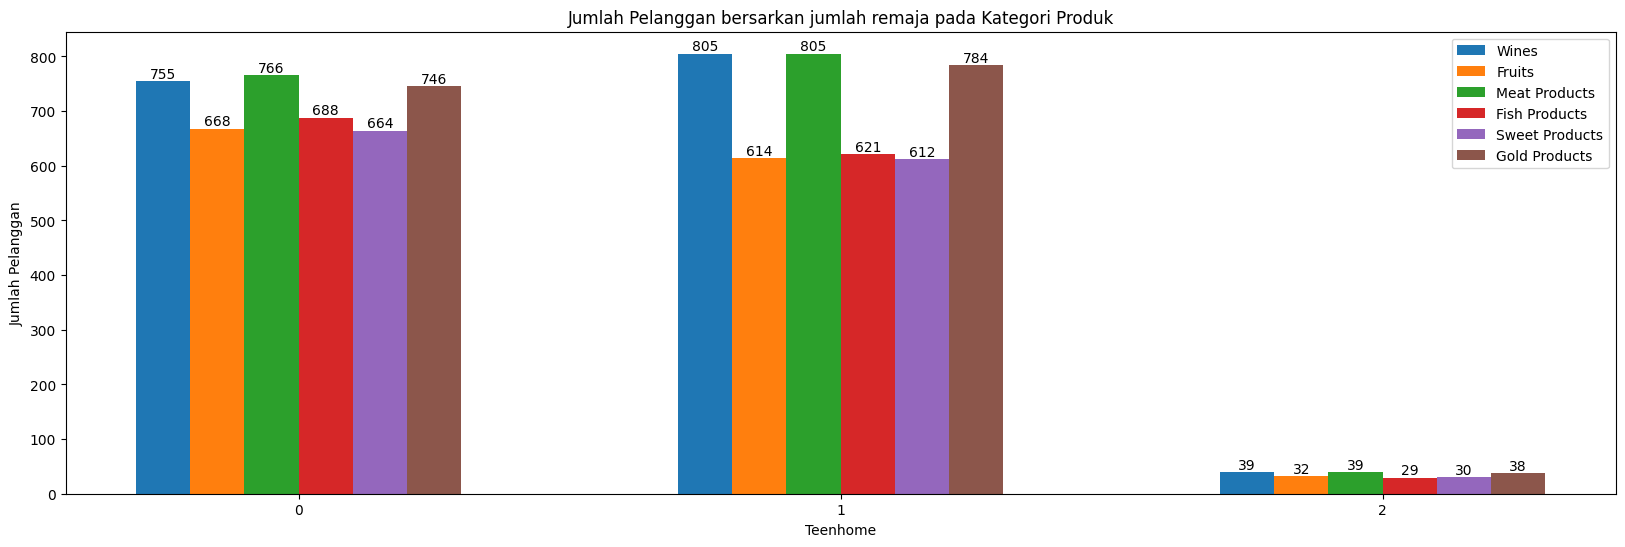

In [70]:



teenhome = [0, 1, 2]
mntWines = [755, 805, 39]
mntFruits = [668, 614, 32]
mntMeatProducts = [766, 805, 39]
mntFishProducts = [688, 621, 29]
mntSweetProducts = [664, 612, 30]
mntGoldProds = [746, 784, 38]


bar_width = 0.1
index = np.arange(len(teenhome))

fig, ax = plt.subplots(figsize=(20, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Teenhome')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan bersarkan jumlah remaja pada Kategori Produk')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(teenhome)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


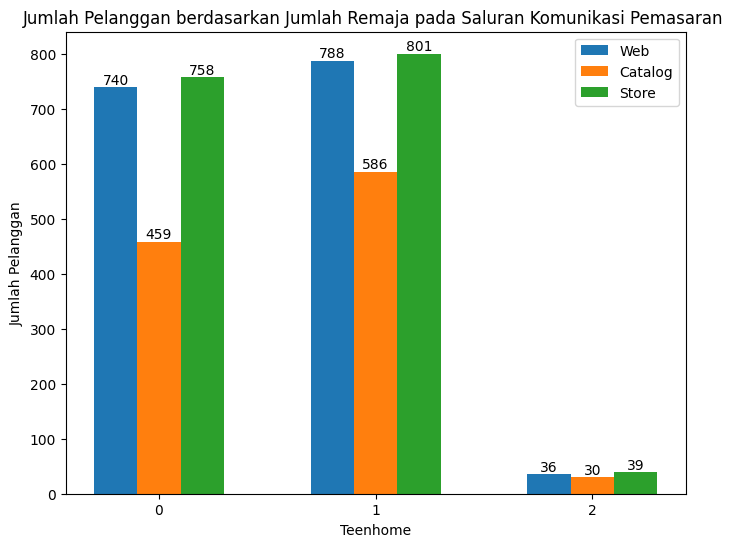

In [71]:


teenhome = [0, 1, 2]
jumlah_pelanggan_web = [740, 788, 36]
jumlah_pelanggan_catalog = [459, 586, 30]
jumlah_pelanggan_store = [758, 801, 39]


bar_width = 0.2
index = np.arange(len(teenhome))

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index, jumlah_pelanggan_web, bar_width, label='Web')
bar2 = ax.bar(index + bar_width, jumlah_pelanggan_catalog, bar_width, label='Catalog')
bar3 = ax.bar(index + 2*bar_width, jumlah_pelanggan_store, bar_width, label='Store')


ax.set_xlabel('Teenhome')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Jumlah Remaja pada Saluran Komunikasi Pemasaran ')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(teenhome)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()


Kita bisa melihat:
1. Jumlah penolakan penawaran pelanggan yang tidak memiliki remaja dikeluarga, dan pelanggan yang memiliki 1 remaja lebih tinggi dibandingkan 2 remaja.
2. Secara proporsi pelanggan yang tidak memiliki remaja 33% dan pelanggan yang memiliki 1 remaja tingkat penerimaannya hanya 21% maka strategi pemasaran yang tepat harus dibuat untuk meningkatkan penerimaan penawaran.
3. Kategori Produk yang paling diminati adalah Wines dengan 755 pelanggan, Meat dengan 766 pelanggan dan Gold dengan 746 pelanggan.
4. Kategori Produk yang paling diminati adalah Wines dengan 805 pelanggan, Meat dengan 805 pelanggan dan Gold dengan 784 pelanggan.


Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:

1. Pada Pelanggan yang tidak memiliki remaja.

-  Bundle kategori produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yang tidak memiliki remaja, dengan kategori produk yang kurang diminati produk Permen dan produk Buah-buahan.
-  Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
-  Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls

- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori yang tidak memiliki anak yang lebih memilih bertransaksi  di Toko Langsung dan Web.

2. Pada Pelanggan yang memiliki 1 remaja:

- Bundle dengan produk Gold,Wine dan Meat yang merupakan produk yang paling diminati pelanggan dikategori yang  memiliki 1 remaja, dengan produk yang kurang diminati seperti buah-buahan dan permen.
- Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
- Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
- Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori memiliki 1 remaja yang lebih memilih bertransaksi  di Toko Langsung dan Web.

# Complain 
Karakteristik pelanggan yang tidak pernah menerima tawaran berdasarkan apakah konsumen pernah mengeluh sebelumnya atau tidak.


In [72]:
df_c=pd.crosstab(sc['Complain'],sc['Overall_Acceptance'])
df_c['Total']=df_c.sum(axis=1)
df_c.sort_values('Total',ascending=False)

Overall_Acceptance,0,1,Total
Complain,,,
0,1593,602,2195
1,18,3,21


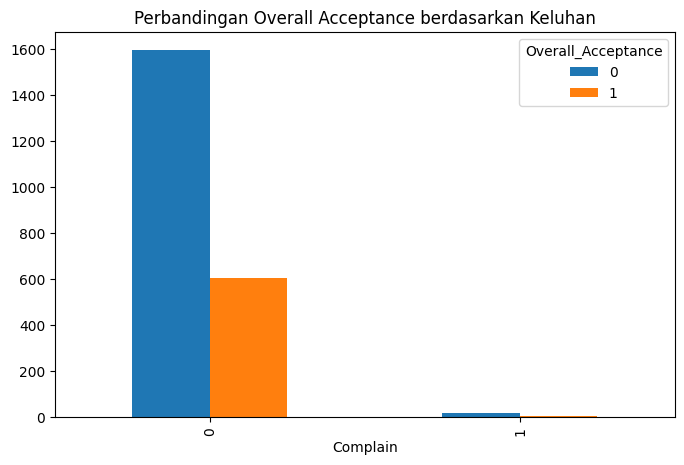

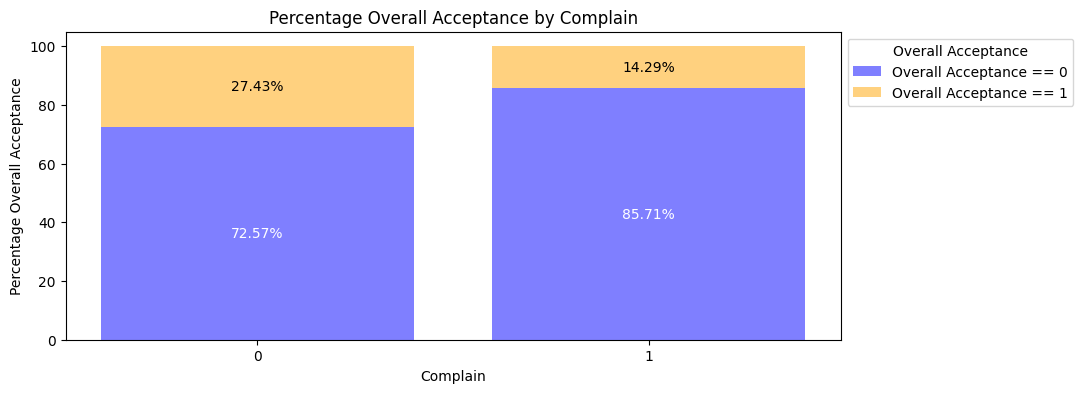

In [73]:
df_c.drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Perbandingan Overall Acceptance berdasarkan Keluhan')
plt.show()


data_c = {
    'Complain': [0, 1],
    'Tidak Pernah Menerima': [1593, 18],
    'Pernah Menerima Penawaran': [602, 3]
}

df_c = pd.DataFrame(data_c)
df_c['Overall_Acceptance'] = df_c['Tidak Pernah Menerima'] + df_c['Pernah Menerima Penawaran']

df_c['Persentase_0'] = df_c['Tidak Pernah Menerima'] / df_c['Overall_Acceptance'] * 100
df_c['Persentase_1'] = df_c['Pernah Menerima Penawaran'] / df_c['Overall_Acceptance'] * 100

plt.figure(figsize=(10, 4))


bars_0 = plt.bar(np.arange(len(df_c['Complain'])), df_c['Persentase_0'], label='Overall Acceptance == 0', color='blue', alpha=0.5)


bars_1 = plt.bar(np.arange(len(df_c['Complain'])), df_c['Persentase_1'], bottom=df_c['Persentase_0'], label='Overall Acceptance == 1', color='orange', alpha=0.5)

for bar_0, bar_1, label_0, label_1 in zip(bars_0, bars_1, df_c['Persentase_0'], df_c['Persentase_1']):
    plt.text(bar_0.get_x() + bar_0.get_width() / 2, label_0 / 2, f'{label_0:.2f}%', ha='center', va='center', color='white')
    plt.text(bar_1.get_x() + bar_1.get_width() / 2, label_0 + label_1 / 2, f'{label_1:.2f}%', ha='center', va='center', color='black')

plt.xlabel('Complain')
plt.ylabel('Percentage Overall Acceptance')
plt.legend(title='Overall Acceptance', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(np.arange(len(df_c['Complain'])), df_c['Complain'])
plt.title('Percentage Overall Acceptance by Complain')

plt.show()



In [74]:
resultc = sc[sc['Overall_Acceptance'] == 0].groupby(['Complain']).agg(
    Jumlah_Pelanggan_MntWines=('MntWines', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFruits=('MntFruits', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntMeatProducts=('MntMeatProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntFishProducts=('MntFishProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntSweetProducts=('MntSweetProducts', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_MntGoldProds=('MntGoldProds', lambda x: (x > 0).sum())
).reset_index()

# Menampilkan hasil
resultc

,Complain,Jumlah_Pelanggan_MntWines,Jumlah_Pelanggan_MntFruits,Jumlah_Pelanggan_MntMeatProducts,Jumlah_Pelanggan_MntFishProducts,Jumlah_Pelanggan_MntSweetProducts,Jumlah_Pelanggan_MntGoldProds
0,0,1581,1299,1592,1327,1292,1550
1,1,18,15,18,11,14,18


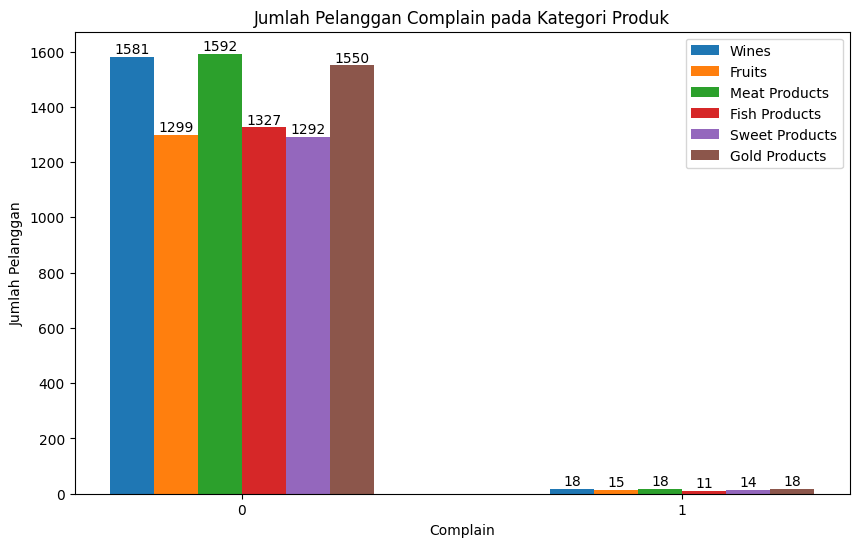

In [75]:


complain = [0, 1]
mntWines = [1581, 18]
mntFruits = [1299, 15]
mntMeatProducts = [1592, 18]
mntFishProducts = [1327, 11]
mntSweetProducts = [1292, 14]
mntGoldProds = [1550, 18]


bar_width = 0.1
index = np.arange(len(complain))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, mntWines, bar_width, label='Wines')
bar2 = ax.bar(index + bar_width, mntFruits, bar_width, label='Fruits')
bar3 = ax.bar(index + 2*bar_width, mntMeatProducts, bar_width, label='Meat Products')
bar4 = ax.bar(index + 3*bar_width, mntFishProducts, bar_width, label='Fish Products')
bar5 = ax.bar(index + 4*bar_width, mntSweetProducts, bar_width, label='Sweet Products')
bar6 = ax.bar(index + 5*bar_width, mntGoldProds, bar_width, label='Gold Products')


ax.set_xlabel('Complain')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan Complain pada Kategori Produk')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(complain)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
autolabel(bar4)
autolabel(bar5)
autolabel(bar6)

plt.show()


In [76]:
resultct = sc[sc['Overall_Acceptance'] == 0].groupby(['Complain']).agg(
    Jumlah_Pelanggan_Web=('NumWebPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Catalog=('NumCatalogPurchases', lambda x: (x > 0).sum()),
    Jumlah_Pelanggan_Store=('NumStorePurchases', lambda x: (x > 0).sum())
).reset_index()

resultct

,Complain,Jumlah_Pelanggan_Web,Jumlah_Pelanggan_Catalog,Jumlah_Pelanggan_Store
0,0,1547,1067,1580
1,1,17,8,18


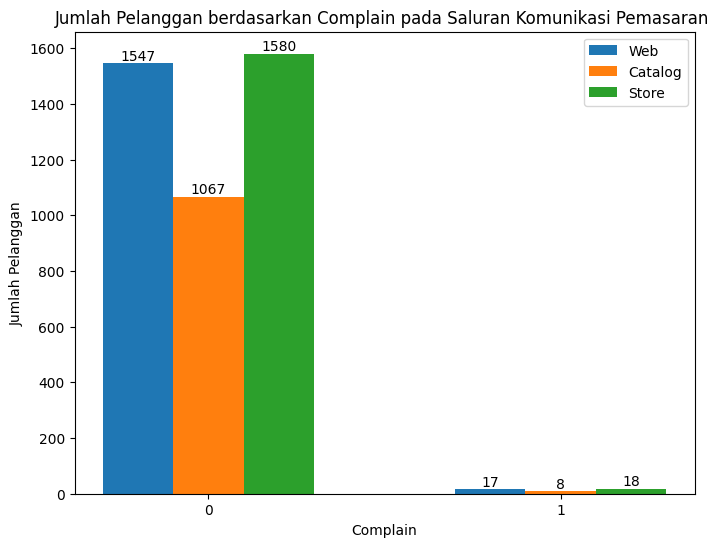

In [77]:

complain = [0, 1]
jumlah_pelanggan_web = [1547, 17]
jumlah_pelanggan_catalog = [1067, 8]
jumlah_pelanggan_store = [1580, 18]


bar_width = 0.2
index = np.arange(len(complain))

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index, jumlah_pelanggan_web, bar_width, label='Web')
bar2 = ax.bar(index + bar_width, jumlah_pelanggan_catalog, bar_width, label='Catalog')
bar3 = ax.bar(index + 2*bar_width, jumlah_pelanggan_store, bar_width, label='Store')


ax.set_xlabel('Complain')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan berdasarkan Complain pada Saluran Komunikasi Pemasaran ')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(complain)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 '%d' % int(height),
                 ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()


Kita bisa melihat:
1. Jumlah penolakan penawaran pelanggan yang tidak pernah complain dibanding pelanggan yang pernah complain.
2. Secara proporsi pelanggan yang pernah tidak pernah complain penerimaan tawarannya hanya 27% artinya bisa ditingkatkan lagi dengan strategi pemasaran yang lebih baik.
3. Kategori produk yang paling diminati adalah , Wine dengan 1581 pelanggan, Meat dengan 1592 pelanggan dan Gold dengan 1550 pelanggan.

Rekomendasi kegiatan promo untuk meningkatkan Penerimaan Tawaran Produk:

- Pada Pelanggan yang tidak pernah complain .

1. Bundle dengan kategori produk Gold ,Wine dan Meat  yang merupakan produk yang paling diminati dengan kategori produk yang kurang diminati seperti buah- buahan dan permen.
2. Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
3.  Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls
4. Saluran Komunikasi Pemasaran sebaiknya difokuskan di Toko Langsung dan di Web, sesuai mayoritas pelanggan di kategori yang tidak pernah complain yang lebih memilih bertransaksi  di Toko Langsung dan Web.


# Kesimpulan

- Ada 72,7 % Pelanggan yang tidak pernah menerima penawaran
- Kategori Usia:
1. Jumlah pelanggan di kategori Dewasa Akhir dan Lansia Awal dan Lansia Akhir menjadi pelanggan dengan penolakan terhadap penawaran yang paling tinggi, dibandingkan Remaja dan Manula.
2. Secara proporsi pelanggan pada kategori Dewasa Akhir  presentase penerimaan penawarannya 28% , Lansia Awal  presentase penerimaan penawaran 26% dan Lansia Akhir presentase penerimaan  penawaran 25%  artinya strategi yang tepat harus dibuat agar penerimaan penawaran meningkat.
3. Kategori Produk yang paling diminati pelanggan di kategori Dewasa Akhir, Lansia Awal dan lansia Akhir adalah Wine,Meat pelanggan dan Gold
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori Dewasa Akhir, Lansia Awal dan lansia Akhir adalah Toko dan Web.
- Status Pernikahan
1. Jumlah pelanggan di umur pertengahan Married dan Together menjadi pelanggan dengan penolakan terhadap penawaran yang paling tinggi, dibandingkan pelanggan di kategori Single, Divorced, Widow.
2. Secara proporsi dikategori Married  dan dikategori Together adalah 25% artinya strategi pemasaran yang tepat harus dibuat untuk meningkatkan penerimaan penwaran.
3. Kategori Produk yang paling diminati pelanggan di kategori Married dan Together Wine, Gold dan Meat.
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori Married dan Together adalah Toko dan Web.
- Tingkat Pendidikan
1. Jumlah penolakan penawaran pada tingkat pendidikan Graduation dan Master lebih tinggi  dibandingkan Basic dan PhD.
2. Secara proporsi presentasi penawarannya Graduation 27% dan Master 25%, artinya maka strategi pemasaran yang tepat harus dibuat agar penerimaan penawaran  meningkat
3. Kategori Produk yang paling diminati pelanggan di kategori Graduation dan Master adalah Wine, Meat dan Gold.
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori Grasuation dan Master adalah Toko dan Web.

- Jumlah anak pada keluarga
1. Jumlah penolakan penawaran pelanggan yang tidak punya anak dan pelanggan yang memiliki anak 1 lebih tinggi dibandingkan 2 anak.
2. Secara proporsi pelanggan yang tidak memiliki  anak  penerimaan tawarannya hanya 33 % dan pelanggan yang memiliki 1 anak 19% maka strategi pemasaran yang tepat harus dibuat agar penerimaan penawaran  meningkat.
3. Kategori produk yang paling diminati pelanggan di kategori yang tidak memiliki anak dan yang memiliki 1 anak  adalah Wine, Gold dan Meat.
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori tidak memiliki anak dan yang memiliki 1 anak  adalah Toko dan Web.

- Jumlah Remaja pada Keluarga
1. Jumlah penolakan penawaran pelanggan yang tidak memiliki remaja dikeluarga, dan pelanggan yang memiliki 1 remaja lebih tinggi dibandingkan 2 remaja.
2. Secara proporsi pelanggan yang tidak memiliki remaja 33% dan pelanggan yang memiliki 1 remaja tingkat penerimaannya hanya 21% maka strategi pemasaran yang tepat harus dibuat untuk meningkatkan penerimaan penawaran.
3. Kategori Produk yang paling diminati pelanggan pada kategori yang tidak memiliki remaja dan yang memiliki 1 remaja adalah Wines, Meat dan Gold.
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori tidak memiliki remaja dan yang memiliki 1 remaja adalah Toko dan Web.

- Pernah complain sebelumnya
1. Jumlah penolakan penawaran pelanggan yang tidak pernah complain dibanding pelanggan yang pernah complain.
2. Secara proporsi pelanggan yang pernah tidak pernah complain penerimaan tawarannya hanya 27% artinya bisa ditingkatkan lagi dengan strategi pemasaran yang lebih baik.
3. Kategori produk yang paling diminati yang tidak pernah complain sebelumnya adalah , Wine, Meat dan Gold.
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori belum pernah complain sebelumnya adalah Toko dan Web.

- Kelas Ekonomi
1. Jumlah penolakan penawaran pelanggan yang di kategori lower dan middle lebih tingi dibandingkan pelanggan dikategori upper.
2. Secara proporsi pelanggan di kategori lower 16% dan middle 30% persentase penerimaan penawarannya
3. Kategori produk yang paling diminati pelanggan dikategori Lower dan Middle adalah Wines, Gold dan Meat.
4. Saluran Komunikasi pemasaran yang paling populer pada pelanggan kategori lower dan middle adalah Toko dan Web.



# Rekomendasi  
- Kategori Produk
Untuk target campaign berikutnya, pelanggan yang ada di kategori usia yaitu pada Dewasa Akhir, Lansia  Awal dan Lansia Akhir , kelas ekonomi yaitu Lower dan Middle , status pernikahan  pada Married dan Together, tingkat pendidikan yaitu pada Graduation dan Master, jumlah anak pada keluarga pada pelanggan yang tidak memiliki anak dan tidak memiliki anak, jumlah remaja pada keluarga pada pelanggan yang tidak memiliki remaja dan memiliki 1 remaja, pelanggan yang belum pernah complain sebelumnya, produk yang paling diminati adalah Gold, Wine dan Meat, maka kegiatan promo yang direkomendasikan:
1. Bundle dengan kategori produk Gold,Wine dan Meat yang merupakan produk yang paling diminati target pelanggan, dengan produk yang kurang diminati seperti buah-buahan dan permen.
2. Cross-Selling, Tawarkan diskon atau paket spesial ketika pelanggan membeli produk yang populer bersamaan dengan produk yang kurang diminati. Misalnya, jika seseorang membeli Wine, berikan diskon untuk Buah-buahan.
3. Flash Sale atau Limited Time Offer, Buat penawaran dengan waktu terbatas selama 3 jam, yang mencakup produk yang kurang diminati dan produk yang populer untuk mendorong pembelian impuls.
- Saluran Komunikasi
Untuk target pelanggan pelanggan yang ada di di kategori usia,pendapatan, status pernikahan, tingkat pendidikan, jumlah anak pada keluarga, jumlah remaja pada keluarga, pernah complain sebelumnya, focus untuk melakukan kegiatan di toko dan di web


 



